In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


## carga de librerias

In [2]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')

#paquetes y librerias necesarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import tqdm
import time
from PIL import Image
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from IPython.display import clear_output
from dateutil.parser import parse
from datetime import datetime
import seaborn as sns
import scipy.stats as stats


#from datetime import datetime
#from dateutil.parser import parse
#from googletrans import Translator


%matplotlib inline 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Carga y tratamiento de los datos

In [65]:
path = '/content/gdrive/My Drive/proyecto_machine_learning/'
df = pd.read_parquet(path + 'tweets_definitivo_hasta_2016_version_super_arreglada_traducida.parquet.gzip')

for i in range(len(df['tweet'])):
    #Esto es para eliminar un par de tweets que estan guardados como NaN y dan problemas
    if df['tweet'][i] != df['tweet'][i]: df['tweet'][i] = ''
    if df['tweet_limpios'][i] != df['tweet_limpios'][i]: df['tweet_limpios'][i] = ''
print(len(df['tweet']))
df.head(5) # for showing a snapshot of the dataset

138203


,numero,tweet,nombre,posicion,cuenta,fecha,año,mes,tweet_limpios,tweet_limpios_ingles
0,0,Acabo de sumarme a la #HoradelPlaneta con @WWF...,PSOE,GOV,@JoseantonioJun,2017-03-22,2017,3,Acabo sumarme HoradelPlaneta source webcorpora...,Just join webcorporativa HoradelPlaneta campai...
1,1,"""Nos hemos quedado huérfanos de una fiscalía q...",POD,GOV,@anamarcelloana,2016-03-04,2016,3,quedado huérfanos fiscalía defendido inter Inf...,Prosecutors argued inter orphaned InfantaJuzgadaM
2,2,Acto Electoral en las #TorresdeCotillas Jueve...,VOX,OPO,@Vox_Molina,2019-11-05,2019,11,Acto Electoral TorresdeCotillas Jueves Casa Cu...,TorresdeCotillas Electoral Act Thursday Cultur...
3,3,Para llevarse tan mal se entienden muy bien. P...,PSOE,GOV,@sanchezcastejon,2018-03-26,2018,3,llevarse entienden bien vuelven demostrarnos c...,They are well understood same faces show us cu...
4,4,#ComienzaElCambio en Andalucía tras cuatro déc...,PP,OPO,@pablocasado_,2019-01-16,2019,1,ComienzaElCambio Andalucía tras cuatro décadas...,ComienzaElCambio Andalusia after four decades ...


Esta parte es muy interesante, los diferentes labe que vamos a caracterizar son palabras, lo pasamos a numeros para que los codigos de machine learning los pillen

In [4]:
#categorizamos los partidos

#labelencoder = LabelEncoder()
#df['nombre_cat'] = labelencoder.fit_transform(df['nombre'])
#Ciudadanos -> 0 ; Podemos -> 1 ; PP -> 2 ; PSOE -> 3 ; VOX -> 4

def menos1listmaker(n):
    listofzeros = [-1] * n
    return listofzeros
df['nombre_cat'] = menos1listmaker(len(df['nombre']))
df['posicion_cat'] = menos1listmaker(len(df['nombre']))
df['tendencia_politica'] = menos1listmaker(len(df['nombre']))
df['tendencia_politica_cat'] = menos1listmaker(len(df['nombre']))


for i in range(len(df['nombre'])):
  if df['nombre'][i] == 'POD': 
    df['nombre_cat'][i]=0
    df['posicion'][i]='sidebands'
    df['posicion_cat'][i]=1
    df['tendencia_politica'][i]='Izq'
    df['tendencia_politica_cat'][i]=0   

  if df['nombre'][i] == 'PSOE': 
    df['nombre_cat'][i]=1
    df['posicion'][i]='bulk'
    df['posicion_cat'][i]=0
    df['tendencia_politica'][i]='Izq'
    df['tendencia_politica_cat'][i]=0   

  if df['nombre'][i] == 'CIU': 
    df['nombre_cat'][i]=2
    df['posicion'][i]='bulk'
    df['posicion_cat'][i]=0
    df['tendencia_politica'][i]='Der'
    df['tendencia_politica_cat'][i]=1   

  if df['nombre'][i] == 'PP': 
    df['nombre_cat'][i]=3
    df['posicion'][i]='bulk'
    df['posicion_cat'][i]=0
    df['tendencia_politica'][i]='Der'
    df['tendencia_politica_cat'][i]=1   

  if df['nombre'][i] == 'VOX': 
    df['nombre_cat'][i]=4
    df['posicion'][i]='sidebands'
    df['posicion_cat'][i]=1
    df['tendencia_politica'][i]='Der'
    df['tendencia_politica_cat'][i]=1   

#Podemos -> 0 ; PSOE -> 1 ; Ciudadanos -> 2 ; PP -> 3 ; VOX -> 4

df.head(5) # for showing a snapshot of the dataset


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to b

,numero,tweet,nombre,posicion,cuenta,fecha,año,mes,tweet_limpios,tweet_limpios_ingles,nombre_cat,posicion_cat,tendencia_politica,tendencia_politica_cat
0,0,Acabo de sumarme a la #HoradelPlaneta con @WWF...,PSOE,bulk,@JoseantonioJun,2017-03-22,2017,3,Acabo sumarme HoradelPlaneta source webcorpora...,Just join webcorporativa HoradelPlaneta campai...,1,0,Izq,0
1,1,"""Nos hemos quedado huérfanos de una fiscalía q...",POD,sidebands,@anamarcelloana,2016-03-04,2016,3,quedado huérfanos fiscalía defendido inter Inf...,Prosecutors argued inter orphaned InfantaJuzgadaM,0,1,Izq,0
2,2,Acto Electoral en las #TorresdeCotillas Jueve...,VOX,sidebands,@Vox_Molina,2019-11-05,2019,11,Acto Electoral TorresdeCotillas Jueves Casa Cu...,TorresdeCotillas Electoral Act Thursday Cultur...,4,1,Der,1
3,3,Para llevarse tan mal se entienden muy bien. P...,PSOE,bulk,@sanchezcastejon,2018-03-26,2018,3,llevarse entienden bien vuelven demostrarnos c...,They are well understood same faces show us cu...,1,0,Izq,0
4,4,#ComienzaElCambio en Andalucía tras cuatro déc...,PP,bulk,@pablocasado_,2019-01-16,2019,1,ComienzaElCambio Andalucía tras cuatro décadas...,ComienzaElCambio Andalusia after four decades ...,3,0,Der,1


para reducir el set solo a tweets relativamente largos, para eso creamos un nuevo campo

In [5]:
numero_palabras = []
#voy a añadir tambien una columna para el sentimental analisis, sera util mas adelante!
sentimental = []
#Esto es para añadir la semana, tambien sera util en el sentimental analisis
semana = []
for i in df['numero']:
    numero_palabras.append(len(df['tweet_limpios'][i].split()))
    sentimental.append('none')
    semana.append(parse(df['fecha'][i]).isocalendar()[1])
df['cantidad_palabras']=numero_palabras
df['sentimental_value']=sentimental
df['semana'] = semana


df.drop_duplicates(subset ="tweet", keep = False, inplace = True) #Esto elimina posibles tweets repetidos
#df.head(5)
df = df[df['cantidad_palabras']>7] #yo creo que un tweet de 7 palabras ya esta muy bien no? ademas es despues de haberlos limpiado

In [6]:
print(len(df['tweet_limpios']))
df.head(5)

107972


,numero,tweet,nombre,posicion,cuenta,fecha,año,mes,tweet_limpios,tweet_limpios_ingles,nombre_cat,posicion_cat,tendencia_politica,tendencia_politica_cat,cantidad_palabras,sentimental_value,semana
0,0,Acabo de sumarme a la #HoradelPlaneta con @WWF...,PSOE,bulk,@JoseantonioJun,2017-03-22,2017,3,Acabo sumarme HoradelPlaneta source webcorpora...,Just join webcorporativa HoradelPlaneta campai...,1,0,Izq,0,10,none,12
2,2,Acto Electoral en las #TorresdeCotillas Jueve...,VOX,sidebands,@Vox_Molina,2019-11-05,2019,11,Acto Electoral TorresdeCotillas Jueves Casa Cu...,TorresdeCotillas Electoral Act Thursday Cultur...,4,1,Der,1,14,none,45
3,3,Para llevarse tan mal se entienden muy bien. P...,PSOE,bulk,@sanchezcastejon,2018-03-26,2018,3,llevarse entienden bien vuelven demostrarnos c...,They are well understood same faces show us cu...,1,0,Izq,0,17,none,13
4,4,#ComienzaElCambio en Andalucía tras cuatro déc...,PP,bulk,@pablocasado_,2019-01-16,2019,1,ComienzaElCambio Andalucía tras cuatro décadas...,ComienzaElCambio Andalusia after four decades ...,3,0,Der,1,17,none,3
5,5,En #PriegoDeCórdoba con @MLuisaCeballos Apelam...,PP,bulk,@ja_nietob,2018-11-27,2018,11,PriegoDeCórdoba Apelamos voto útil cambio nunc...,We appeal PriegoDeCórdoba helpful vote polls c...,3,0,Der,1,21,none,48


Definimos la funcion de procesado de texto, se usa para el bag of words

In [7]:
lemmatiser = WordNetLemmatizer()

# Defining a module for Text Processing
def text_process(tex):
    # 1. Eliminamos todas las cosas de marcacion, rollo puntos, comas, etc
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    
    # 2. Lemmatisation: proceso de agrupacion de palabras segun la raiz, por ejemplo
    #    studing y study en el fondo son la misma palabra
    
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
        
    # 3. Eliminamos todas las palabras cortas e inutiles, rollo a, an, the... que no nos
    #   dicen absolutamente nada de la forma de escribir del autor
    return [word for word in a.split() if word.lower() not in stopwords.words('spanish')]
    #return [word for word in nopunct.split() if word.lower() not in stopwords.words('spanish')]




Mostramos el cloudword de cada formación política

107972
107972
Podemos


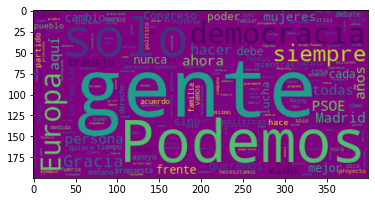

PSOE


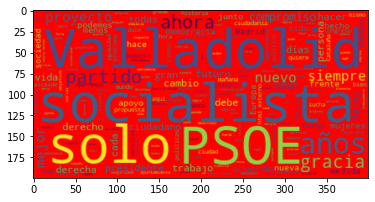

Ciudadanos


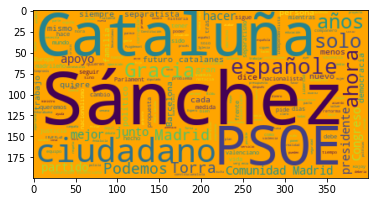

PP


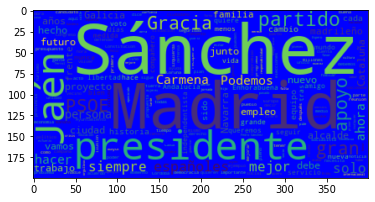

VOX


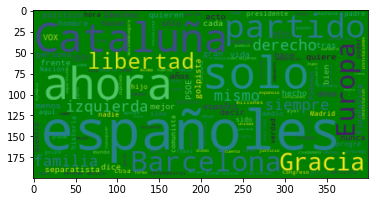

In [8]:


X = df['tweet_limpios']
y = df['nombre_cat'] 

words_Ciudadanos = ''
words_Podemos = ''
words_VOX = ''
words_PP = ''
words_PSOE = ''

auxiliar = 0

print(len(X))
print(len(y))



for i in df['numero']:
    if y[i]==0:
        words_Podemos = words_Podemos + X[i]
    if y[i]==1:
        words_PSOE = words_PSOE + X[i]
    if y[i]==2:
        words_Ciudadanos = words_Ciudadanos + X[i]
    if y[i]==3:
        words_PP = words_PP + X[i]
    if y[i]==4:
        words_VOX = words_VOX + X[i]
REMOVEW=['Gobierno','España','política','país','toda','puede']
from PIL import Image
import requests
from io import BytesIO

from matplotlib import cm


url="https://s03.s3c.es/imag/_v0/770x420/9/4/a/490x_Unidos-Podemos.png"
response = requests.get(url)
mask = np.array(Image.open(BytesIO(response.content)))

wordcloud0 = WordCloud(stopwords=REMOVEW,background_color="purple").generate(words_Podemos) # para Ciudadanos
wordcloud1 = WordCloud(stopwords=REMOVEW,background_color="red").generate(words_PSOE) # para Podemos
wordcloud2 = WordCloud(stopwords=REMOVEW,background_color="orange").generate(words_Ciudadanos) # para PP
wordcloud3 = WordCloud(stopwords=REMOVEW,background_color="blue").generate(words_PP) # para PSOE 
wordcloud4 = WordCloud(stopwords=REMOVEW,background_color="green").generate(words_VOX) # para VOX

print('Podemos')
plt.imshow(wordcloud0, interpolation='bilinear')
plt.show()
print('PSOE')
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()
print('Ciudadanos')
plt.imshow(wordcloud2, interpolation='bilinear')
plt.show()
print('PP')
plt.imshow(wordcloud3, interpolation='bilinear')
plt.show()
print('VOX')
plt.imshow(wordcloud4, interpolation='bilinear')
plt.show()



In [9]:
n0=len(df[df['nombre_cat']==0])
n1=len(df[df['nombre_cat']==1])
n2=len(df[df['nombre_cat']==2])
n3=len(df[df['nombre_cat']==3])
n4=len(df[df['nombre_cat']==4])
print(n0,n1,n2,n3,n4)


28642 19374 21931 16072 21953


Para el analisis, voy a hacer undersampling: reducir todos los tweets a 16072 por formacion politica

In [10]:
df_PODEMOS=df[df['nombre_cat'] == 0]
df_PSOE=df[df['nombre_cat'] == 1]
df_Ciudadanos=df[df['nombre_cat'] == 2]
df_PP=df[df['nombre_cat'] == 3]
df_VOX=df[df['nombre_cat'] == 4]

df_Ciudadanosu = df_Ciudadanos.sample(n3)
df_PODEMOSu = df_PODEMOS.sample(n3)
df_VOXu = df_VOX.sample(n3)
df_PSOEu = df_PSOE.sample(n3)
df_under = pd.concat([df_PODEMOSu,df_PSOEu, df_Ciudadanosu, df_PP,df_VOXu], axis=0)

df_under = df_under.sample(frac=1)

df_under.shape #Para mezclar un poco los datos

(80360, 17)

## Prediccion del Partido Politico

###Preparacion de los datos para el machine learning

In [11]:
Xu = df_under['tweet_limpios']
yu = df_under['nombre_cat'] 

In [12]:
X_train_NN, X_valtest_NN, y_train_NN, y_valtest_NN = train_test_split(Xu, yu,test_size=0.2)
X_test_NN, X_val_NN, y_test_NN, y_val_NN = train_test_split(X_valtest_NN, y_valtest_NN, test_size=0.5)


In [13]:
num_classes = 5
y_train_NN_cat = keras.utils.to_categorical(y_train_NN, num_classes)
y_test_NN_cat = keras.utils.to_categorical(y_test_NN, num_classes)
y_val_NN_cat = keras.utils.to_categorical(y_val_NN, num_classes)
y_valtest_NN_cat = keras.utils.to_categorical(y_valtest_NN, num_classes)

y_train_NN_cat[4]

array([0., 0., 0., 0., 1.], dtype=float32)

In [14]:
print(X_train_NN.shape[0], 'elementos en el train')
print(X_test_NN.shape[0], 'elementos en el test')
print(X_val_NN.shape[0], 'elementos en el validation')
print(X_valtest_NN.shape[0], 'elementos en el validation + test')

64288 elementos en el train
8036 elementos en el test
8036 elementos en el validation
16072 elementos en el validation + test


In [15]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_train_NN)
# transformamos los datos en un bag-of-words
text_bow_train_NN=bow_transformer.transform(X_train_NN)#Train
text_bow_test_NN=bow_transformer.transform(X_test_NN)#Test
text_bow_val_NN=bow_transformer.transform(X_val_NN)#Val
text_bow_valtest_NN=bow_transformer.transform(X_valtest_NN)#Val + Test

Funcion de ploteo de las confusion matrix

In [16]:
def funcion_plot_partidos_politicos(prediccion,real):
    mat = confusion_matrix(real, prediccion, labels=[0,1,2,3,4])

    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=['Pod','PSOE','Ciud','PP','VOX'],
            yticklabels=['Pod','PSOE','Ciud','PP','VOX'])
    plt.xlabel('true label')
    plt.ylabel('predicted label');

    plt.show()
    plt.savefig('figura_1.pdf')

    #Normalizada!

    mat = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]

    sns.heatmap(mat.T, square=True, annot=True, cbar=False, fmt="0.2f",cmap="PuBuGn",xticklabels=['Pod','PSOE','Ciud','PP','VOX'],
            yticklabels=['Pod','PSOE','Ciud','PP','VOX'])
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    plt.savefig('figura_2.pdf')

### Sequential NN

Vamos a comparar ahora con lo obtenido mediante una Sequential Neural Network

In [25]:

# La ventaja es que aquí podemos construir nosotros nuestra red neuronal capa a capa
fcmodel = Sequential()
num_classes=5
NB_words = 83883 #  si el programa falla te indica cual tienes que poner
#creamos nuestras diferentes capas
fcmodel.add(Dense(16, activation='relu', input_shape=(NB_words,)))
fcmodel.add(Dropout(0.3))
fcmodel.add(Dense(16, activation='relu'))
fcmodel.add(Dropout(0.3))
fcmodel.add(Dense(16, activation='relu'))
fcmodel.add(Dropout(0.5))
fcmodel.add(Dense(num_classes, activation='softmax'))


In [26]:
fcmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                1342144   
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [27]:
batch_size = 512
epochs = 100
MAX_LEN = 20
# 512 este es el early stopping para detenerlo en el minimo de val_loss
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

STEPS_PER_EPOCH = 52065//batch_size
lr_schedule = keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return keras.optimizers.Adam(lr_schedule)

fcmodel.compile(loss='categorical_crossentropy',
                optimizer=get_optimizer(),
                metrics=['accuracy'])


In [28]:
# training the NN
history = fcmodel.fit(text_bow_train_NN, y_train_NN_cat,
                      batch_size=batch_size,
                      epochs=epochs,
                      callbacks=callbacks, # Early stopping
                      verbose=1,
                      validation_data=(text_bow_val_NN, y_val_NN_cat))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_4/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_4/embedding_lookup_sparse/Reshape:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_4/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


126/126 [==============================] - 4s 24ms/step - loss: 1.5276 - accuracy: 0.3166 - val_loss: 1.3078 - val_accuracy: 0.5394
Epoch 2/100
126/126 [==============================] - 3s 23ms/step - loss: 1.2358 - accuracy: 0.5024 - val_loss: 1.0612 - val_accuracy: 0.6439
Epoch 3/100
126/126 [==============================] - 3s 25ms/step - loss: 1.0075 - accuracy: 0.6192 - val_loss: 0.9655 - val_accuracy: 0.6575
Epoch 4/100
126/126 [==============================] - 3s 24ms/step - loss: 0.8435 - accuracy: 0.6863 - val_loss: 0.9431 - val_accuracy: 0.6685
Epoch 5/100
126/126 [==============================] - 3s 23ms/step - loss: 0.7248 - accuracy: 0.7357 - val_loss: 0.9648 - val_accuracy: 0.6696
Epoch 6/100
126/126 [==============================] - 3s 25ms/step - loss: 0.6357 - accuracy: 0.7716 - val_loss: 0.9955 - val_accuracy: 0.6691


In [29]:
score = fcmodel.evaluate(text_bow_test_NN, y_test_NN_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9789963960647583
Test accuracy: 0.6711050271987915


In [30]:
predictions_SNN = fcmodel.predict(text_bow_test_NN)
print(predictions_SNN)

[[6.4103055e-01 1.1172614e-01 1.9992770e-01 2.6509019e-02 2.0806590e-02]
 [2.8635764e-01 1.9555299e-01 2.4729094e-01 1.6932264e-01 1.0147569e-01]
 [2.8299464e-02 7.5699963e-02 3.2180178e-01 5.1329571e-01 6.0903076e-02]
 ...
 [2.7293068e-01 6.3054109e-01 8.4018679e-03 1.3737718e-02 7.4388631e-02]
 [9.5464429e-04 1.1001047e-02 7.1301335e-03 1.3084946e-03 9.7960562e-01]
 [1.1777584e-04 9.9987864e-01 2.7390565e-10 3.2409611e-07 3.2705120e-06]]


In [31]:
predicciones_SNN = []
for i in range(len(predictions_SNN)):
    predicciones_SNN.append(predictions_SNN[i].argmax())
print(len(predicciones_SNN))
print(len(y_test_NN))

8036
8036


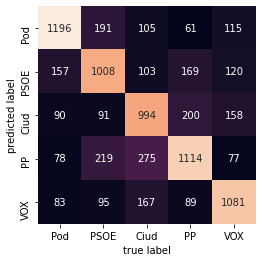

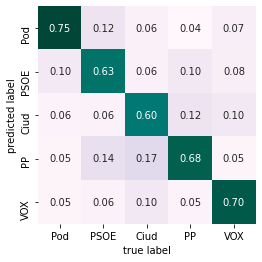

In [32]:
funcion_plot_partidos_politicos(predicciones_SNN,y_test_NN)

## Prediccion del Partido Politico tweets 2019

####Preparacion de los datos

In [33]:
#asi nos quedamos solo con los de 2019
df_2019 = df[df['año']==2019]
print(len(df_2019))

30152


In [34]:
n0_19=len(df_2019[df_2019['nombre_cat']==0])
n1_19=len(df_2019[df_2019['nombre_cat']==1])
n2_19=len(df_2019[df_2019['nombre_cat']==2])
n3_19=len(df_2019[df_2019['nombre_cat']==3])
n4_19=len(df_2019[df_2019['nombre_cat']==4])
print(n0_19,n1_19,n2_19,n3_19,n4_19)

6229 5062 6860 4331 7670


In [35]:
df_PODEMOS19=df_2019[df_2019['nombre_cat'] == 0]
df_PSOE19=df_2019[df_2019['nombre_cat'] == 1]
df_Ciudadanos19=df_2019[df_2019['nombre_cat'] == 2]
df_PP19=df_2019[df_2019['nombre_cat'] == 3]
df_VOX19=df_2019[df_2019['nombre_cat'] == 4]

df_Ciudadanosu19 = df_Ciudadanos19.sample(n3_19)
df_PODEMOSu19 = df_PODEMOS19.sample(n3_19)
df_VOXu19 = df_VOX19.sample(n3_19)
df_PSOEu19 = df_PSOE19.sample(n3_19)
df_under19 = pd.concat([df_PODEMOSu19,df_PSOEu19, df_Ciudadanosu19, df_PP19,df_VOXu19], axis=0)

df_under19.shape

(21655, 17)

In [36]:
Xu_2019 = df_under19['tweet_limpios']
yu_2019 = df_under19['nombre_cat'] 

X_train_NN_2019, X_valtest_NN_2019, y_train_NN_2019, y_valtest_NN_2019 = train_test_split(Xu_2019, yu_2019,test_size=0.2)
X_test_NN_2019, X_val_NN_2019, y_test_NN_2019, y_val_NN_2019 = train_test_split(X_valtest_NN_2019, y_valtest_NN_2019, test_size=0.5)

In [37]:
num_classes = 5
y_train_NN_cat_2019 = keras.utils.to_categorical(y_train_NN_2019, num_classes)
y_test_NN_cat_2019 = keras.utils.to_categorical(y_test_NN_2019, num_classes)
y_val_NN_cat_2019 = keras.utils.to_categorical(y_val_NN_2019, num_classes)
y_valtest_NN_cat_2019 = keras.utils.to_categorical(y_valtest_NN_2019, num_classes)

print(X_train_NN_2019.shape[0], 'train elementos')
print(X_test_NN_2019.shape[0], 'test elementos')
print(X_val_NN_2019.shape[0], 'validation elementos')
print(X_valtest_NN_2019.shape[0], 'validation + test elementos')

17324 train elementos
2165 test elementos
2166 validation elementos
4331 validation + test elementos


In [38]:
bow_transformer_2019=CountVectorizer(analyzer=text_process).fit(X_train_NN_2019)
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_train_NN_2019=bow_transformer.transform(X_train_NN_2019)#ONLY TRAINING DATA
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_test_NN_2019=bow_transformer.transform(X_test_NN_2019)#TEST DATA
text_bow_val_NN_2019=bow_transformer.transform(X_val_NN_2019)#VAL DATA
text_bow_valtest_NN_2019=bow_transformer.transform(X_valtest_NN_2019)#VAL DATA

#### Neural Network

In [43]:
fcmodel = Sequential()
num_classes=5
NB_words = 83883 #  si el programa falla te dice cual tienes que poner
fcmodel.add(Dense(16, activation='relu', input_shape=(NB_words,)))
fcmodel.add(Dropout(0.3))
fcmodel.add(Dense(16, activation='relu'))
fcmodel.add(Dropout(0.3))
fcmodel.add(Dense(16, activation='relu'))
fcmodel.add(Dropout(0.5))
fcmodel.add(Dense(num_classes, activation='softmax'))

In [44]:
fcmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                1342144   
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 5)                

In [45]:
batch_size = 512
epochs = 100
MAX_LEN = 20
# 512 este es el early stopping para detenerlo en el minimo de val_loss
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

STEPS_PER_EPOCH = 52065//batch_size
lr_schedule = keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return keras.optimizers.Adam(lr_schedule)

fcmodel.compile(loss='categorical_crossentropy',
                optimizer=get_optimizer(),
                metrics=['accuracy'])

In [46]:
# training the NN
history = fcmodel.fit(text_bow_train_NN_2019, y_train_NN_cat_2019,
                      batch_size=batch_size,
                      epochs=epochs,
                      callbacks=callbacks, # Early stopping
                      verbose=1,
                      validation_data=(text_bow_val_NN_2019, y_val_NN_cat_2019))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_3/dense_12/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_3/dense_12/embedding_lookup_sparse/Reshape:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_3/dense_12/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


34/34 [==============================] - 2s 28ms/step - loss: 1.5979 - accuracy: 0.2438 - val_loss: 1.5607 - val_accuracy: 0.4090
Epoch 2/100
34/34 [==============================] - 1s 23ms/step - loss: 1.5062 - accuracy: 0.3404 - val_loss: 1.4012 - val_accuracy: 0.4663
Epoch 3/100
34/34 [==============================] - 1s 24ms/step - loss: 1.3587 - accuracy: 0.4092 - val_loss: 1.2347 - val_accuracy: 0.5106
Epoch 4/100
34/34 [==============================] - 1s 25ms/step - loss: 1.1925 - accuracy: 0.4842 - val_loss: 1.0915 - val_accuracy: 0.5683
Epoch 5/100
34/34 [==============================] - 1s 25ms/step - loss: 1.0447 - accuracy: 0.5656 - val_loss: 0.9942 - val_accuracy: 0.6343
Epoch 6/100
34/34 [==============================] - 1s 26ms/step - loss: 0.9283 - accuracy: 0.6323 - val_loss: 0.9391 - val_accuracy: 0.6796
Epoch 7/100
34/34 [==============================] - 1s 23ms/step - loss: 0.8295 - accuracy: 0.6978 - val_loss: 0.8971 - val_accuracy: 0.7142
Epoch 8/100
34/34 

In [47]:
score = fcmodel.evaluate(text_bow_test_NN_2019, y_test_NN_cat_2019, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8790736198425293
Test accuracy: 0.7168591022491455


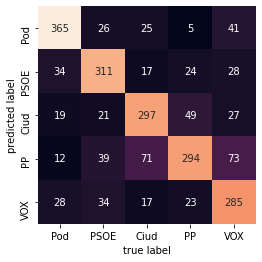

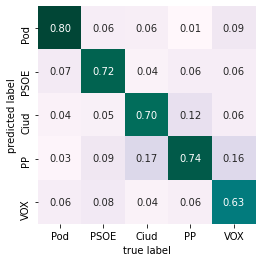

In [48]:
predictions_SNN_2019 = fcmodel.predict(text_bow_test_NN_2019)
predicciones_SNN_2019 = []
for i in range(len(predictions_SNN_2019)):
    predicciones_SNN_2019.append(predictions_SNN_2019[i].argmax())
funcion_plot_partidos_politicos(predicciones_SNN_2019,y_test_NN_2019)




## Prediccion del Partido Politico extremos y centro

### Preparacion de los datos

In [49]:
n0_extremos=len(df_under[df_under['posicion_cat']==0])
n1_extremos=len(df_under[df_under['posicion_cat']==1])
print(n0_extremos,n1_extremos)

48216 32144


In [50]:
df_under_bulk=df_under[df_under['posicion_cat'] == 0]
df_under_sidebands=df_under[df_under['posicion_cat'] == 1]

df_under_bulku = df_under_bulk.sample(n1_extremos)

df_under_extremos = pd.concat([df_under_bulku,df_under_sidebands], axis=0)

df_under_extremos = df_under_extremos.sample(frac=1)

df_under_extremos.shape #Para mezclar un poco los datos

(64288, 17)

In [51]:
Xu_extremos = df_under_extremos['tweet_limpios']
yu_extremos = df_under_extremos['posicion_cat'] 

X_train_NN_extremos, X_valtest_NN_extremos, y_train_NN_extremos, y_valtest_NN_extremos = train_test_split(Xu_extremos, yu_extremos,test_size=0.2)
X_test_NN_extremos, X_val_NN_extremos, y_test_NN_extremos, y_val_NN_extremos = train_test_split(X_valtest_NN_extremos, y_valtest_NN_extremos, test_size=0.5)

In [52]:
num_classes = 2
y_train_NN_cat_extremos = keras.utils.to_categorical(y_train_NN_extremos, num_classes)
y_test_NN_cat_extremos = keras.utils.to_categorical(y_test_NN_extremos, num_classes)
y_val_NN_cat_extremos = keras.utils.to_categorical(y_val_NN_extremos, num_classes)
y_valtest_NN_cat_extremos = keras.utils.to_categorical(y_valtest_NN_extremos, num_classes)

print(X_train_NN_extremos.shape[0], 'train elementos')
print(X_test_NN_extremos.shape[0], 'test elementos')
print(X_val_NN_extremos.shape[0], 'validation elementos')
print(X_valtest_NN_extremos.shape[0], 'validation + test elementos')

51430 train elementos
6429 test elementos
6429 validation elementos
12858 validation + test elementos


In [53]:
bow_transformer_extremos=CountVectorizer(analyzer=text_process).fit(X_train_NN_extremos)
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_train_NN_extremos=bow_transformer_extremos.transform(X_train_NN_extremos)#ONLY TRAINING DATA
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_test_NN_extremos=bow_transformer_extremos.transform(X_test_NN_extremos)#TEST DATA
text_bow_val_NN_extremos=bow_transformer_extremos.transform(X_val_NN_extremos)#VAL DATA
text_bow_valtest_NN_extremos=bow_transformer_extremos.transform(X_valtest_NN_extremos)#VAL DATA

###Neural network

In [58]:
# Sequential means you can build a DNN layer by layer
fcmodel = Sequential()
num_classes=2
NB_words = 75730 #  si el programa peta te dice cual tienes que meter
# Dense has as arguments: 
#  number of neurons, type of activation function, and the input needs to match the output of the previous layer
fcmodel.add(Dense(16, activation='relu', input_shape=(NB_words,)))
# we add a second layer
fcmodel.add(Dropout(0.3))
fcmodel.add(Dense(16, activation='relu'))
fcmodel.add(Dropout(0.3))
fcmodel.add(Dense(16, activation='relu'))
fcmodel.add(Dropout(0.5))
# could include dropout, regularisation, ...
fcmodel.add(Dense(num_classes, activation='softmax'))

In [59]:
fcmodel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                1211696   
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_17 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                

In [60]:
batch_size = 512
epochs = 100
MAX_LEN = 20
# 512 este es el early stopping para detenerlo en el minimo de val_loss
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

STEPS_PER_EPOCH = 52065//batch_size
lr_schedule = keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return keras.optimizers.Adam(lr_schedule)

fcmodel.compile(loss='categorical_crossentropy',
                optimizer=get_optimizer(),
                metrics=['accuracy'])

In [61]:
# training the NN
history = fcmodel.fit(text_bow_train_NN_extremos, y_train_NN_cat_extremos,
                      batch_size=batch_size,
                      epochs=epochs,
                      callbacks=callbacks, # Early stopping
                      verbose=1,
                      validation_data=(text_bow_val_NN_extremos, y_val_NN_cat_extremos))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_5/dense_20/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_5/dense_20/embedding_lookup_sparse/Reshape:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_5/dense_20/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


101/101 [==============================] - 3s 22ms/step - loss: 0.6196 - accuracy: 0.6572 - val_loss: 0.4556 - val_accuracy: 0.8014
Epoch 2/100
101/101 [==============================] - 2s 21ms/step - loss: 0.4106 - accuracy: 0.8352 - val_loss: 0.4013 - val_accuracy: 0.8161
Epoch 3/100
101/101 [==============================] - 2s 21ms/step - loss: 0.2707 - accuracy: 0.9042 - val_loss: 0.4298 - val_accuracy: 0.8158
Epoch 4/100
101/101 [==============================] - 2s 21ms/step - loss: 0.1788 - accuracy: 0.9410 - val_loss: 0.4966 - val_accuracy: 0.8175


In [62]:
score = fcmodel.evaluate(text_bow_test_NN_extremos, y_test_NN_cat_extremos, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5077787637710571
Test accuracy: 0.8111681342124939


In [63]:
def funcion_plot_posicion_politica(prediccion,real):
    mat = confusion_matrix(real, prediccion, labels=[0,1])

    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=['bulk','sidebands'],
            yticklabels=['bulk','sidebands'])
    plt.xlabel('true label')
    plt.ylabel('predicted label');

    plt.show()

    #Normalizada!

    mat = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]

    sns.heatmap(mat.T, square=True, annot=True, cbar=False, fmt="0.2f",cmap="PuBuGn",xticklabels=['bulk','sidebands'],
            yticklabels=['bulk','sidebands'])
    plt.xlabel('true label')
    plt.ylabel('predicted label');

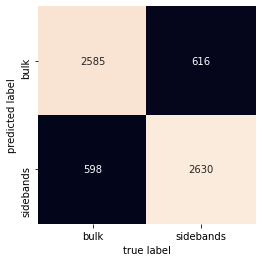

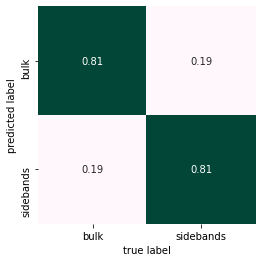

In [64]:
predictions_SNN_extremos = fcmodel.predict(text_bow_test_NN_extremos)
predicciones_SNN_extremos = []
for i in range(len(predictions_SNN_extremos)):
    predicciones_SNN_extremos.append(predictions_SNN_extremos[i].argmax())
funcion_plot_posicion_politica(predicciones_SNN_extremos,y_test_NN_extremos)

## Prediccion del Partido Politico extremos y centro 2019

###Preparacion de los datos

In [ ]:
#asi nos quedamos solo con los de 2019
df_2019 = df[df['año']==2019]
print(len(df_2019))

30152


In [ ]:
n0_extremos_2019=len(df_2019[df_2019['posicion_cat']==0])
n1_extremos_2019=len(df_2019[df_2019['posicion_cat']==1])
print(n0_extremos_2019,n1_extremos_2019)

16253 13899


In [ ]:
df_under_bulk_2019=df_2019[df_2019['posicion_cat'] == 0]
df_under_sidebands_2019=df_2019[df_2019['posicion_cat'] == 1]
df_under_bulku_2019 = df_under_bulk_2019.sample(n1_extremos_2019)
df_under_extremos_2019 = pd.concat([df_under_bulku_2019,df_under_sidebands_2019], axis=0)
df_under_extremos_2019 = df_under_extremos_2019.sample(frac=1)
df_under_extremos_2019.shape #Para mezclar un poco los datos

(27798, 17)

In [ ]:
Xu_extremos_2019 = df_under_extremos_2019['tweet_limpios']
yu_extremos_2019 = df_under_extremos_2019['posicion_cat'] 

X_train_NN_extremos_2019, X_valtest_NN_extremos_2019, y_train_NN_extremos_2019, y_valtest_NN_extremos_2019 = train_test_split(Xu_extremos_2019, yu_extremos_2019,test_size=0.2)
X_test_NN_extremos_2019, X_val_NN_extremos_2019, y_test_NN_extremos_2019, y_val_NN_extremos_2019 = train_test_split(X_valtest_NN_extremos_2019, y_valtest_NN_extremos_2019, test_size=0.5)

In [ ]:
num_classes = 2
y_train_NN_cat_extremos_2019 = keras.utils.to_categorical(y_train_NN_extremos_2019, num_classes)
y_test_NN_cat_extremos_2019 = keras.utils.to_categorical(y_test_NN_extremos_2019, num_classes)
y_val_NN_cat_extremos_2019 = keras.utils.to_categorical(y_val_NN_extremos_2019, num_classes)
y_valtest_NN_cat_extremos_2019 = keras.utils.to_categorical(y_valtest_NN_extremos_2019, num_classes)

print(X_train_NN_extremos_2019.shape[0], 'train elementos')
print(X_test_NN_extremos_2019.shape[0], 'test elementos')
print(X_val_NN_extremos_2019.shape[0], 'validation elementos')
print(X_valtest_NN_extremos_2019.shape[0], 'validation + test elementos')

22238 train elementos
2780 test elementos
2780 validation elementos
5560 validation + test elementos


In [ ]:
bow_transformer_extremos_2019=CountVectorizer(analyzer=text_process).fit(X_train_NN_extremos_2019)
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_train_NN_extremos_2019=bow_transformer_extremos_2019.transform(X_train_NN_extremos_2019)#ONLY TRAINING DATA
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_test_NN_extremos_2019=bow_transformer_extremos_2019.transform(X_test_NN_extremos_2019)#TEST DATA
text_bow_val_NN_extremos_2019=bow_transformer_extremos_2019.transform(X_val_NN_extremos_2019)#VAL DATA
text_bow_valtest_NN_extremos_2019=bow_transformer_extremos_2019.transform(X_valtest_NN_extremos_2019)#VAL DATA

###Neural network

In [ ]:
# Sequential means you can build a DNN layer by layer
fcmodel = Sequential()
num_classes=2
NB_words = 46912 #  si el programa peta te dice cual tienes que meter
# Dense has as arguments: 
#  number of neurons, type of activation function, and the input needs to match the output of the previous layer
fcmodel.add(Dense(16, activation='relu', input_shape=(NB_words,)))
# we add a second layer
fcmodel.add(Dropout(0.3))
fcmodel.add(Dense(16, activation='relu'))
fcmodel.add(Dropout(0.3))
fcmodel.add(Dense(16, activation='relu'))
fcmodel.add(Dropout(0.5))
# could include dropout, regularisation, ...
fcmodel.add(Dense(num_classes, activation='softmax'))

In [ ]:
fcmodel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                750608    
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_17 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                

In [ ]:
batch_size = 512
epochs = 100
MAX_LEN = 20
# 512 este es el early stopping para detenerlo en el minimo de val_loss
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

STEPS_PER_EPOCH = 52065//batch_size
lr_schedule = keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return keras.optimizers.Adam(lr_schedule)

fcmodel.compile(loss='categorical_crossentropy',
                optimizer=get_optimizer(),
                metrics=['accuracy'])

In [ ]:
# training the NN
history = fcmodel.fit(text_bow_train_NN_extremos_2019, y_train_NN_cat_extremos_2019,
                      batch_size=batch_size,
                      epochs=epochs,
                      callbacks=callbacks, # Early stopping
                      verbose=1,
                      validation_data=(text_bow_val_NN_extremos_2019, y_val_NN_cat_extremos_2019))

Epoch 1/100
44/44 [==============================] - 0s 9ms/step - loss: 0.6661 - accuracy: 0.6068 - val_loss: 0.5783 - val_accuracy: 0.7946
Epoch 2/100
44/44 [==============================] - 0s 6ms/step - loss: 0.5072 - accuracy: 0.7573 - val_loss: 0.3976 - val_accuracy: 0.8385
Epoch 3/100
44/44 [==============================] - 0s 6ms/step - loss: 0.3248 - accuracy: 0.8755 - val_loss: 0.3511 - val_accuracy: 0.8471
Epoch 4/100
44/44 [==============================] - 0s 6ms/step - loss: 0.2142 - accuracy: 0.9376 - val_loss: 0.3704 - val_accuracy: 0.8468
Epoch 5/100
44/44 [==============================] - 0s 6ms/step - loss: 0.1439 - accuracy: 0.9653 - val_loss: 0.4111 - val_accuracy: 0.8489


In [ ]:
score = fcmodel.evaluate(text_bow_test_NN_extremos_2019, y_test_NN_cat_extremos_2019, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.456592321395874
Test accuracy: 0.8341726660728455


In [ ]:
def funcion_plot_posicion_politica(prediccion,real):
    mat = confusion_matrix(real, prediccion, labels=[0,1])

    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=['bulk','sidebands'],
            yticklabels=['bulk','sidebands'])
    plt.xlabel('true label')
    plt.ylabel('predicted label');

    plt.show()

    #Normalizada!

    mat = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]

    sns.heatmap(mat.T, square=True, annot=True, cbar=False, fmt="0.2f",cmap="PuBuGn",xticklabels=['bulk','sidebands'],
            yticklabels=['bulk','sidebands'])
    plt.xlabel('true label')
    plt.ylabel('predicted label');

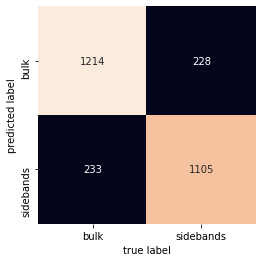

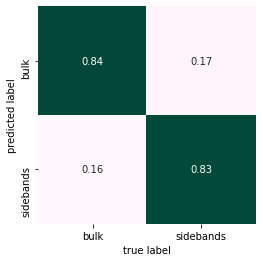

In [ ]:
predictions_SNN_extremos_2019 = fcmodel.predict(text_bow_test_NN_extremos_2019)
predicciones_SNN_extremos_2019 = []
for i in range(len(predictions_SNN_extremos_2019)):
    predicciones_SNN_extremos_2019.append(predictions_SNN_extremos_2019[i].argmax())
funcion_plot_posicion_politica(predicciones_SNN_extremos_2019,y_test_NN_extremos_2019)

##Prediccion del Partido Politico Derecha e Izquierda 2019 sin ciudadanos

###Preparacion de los datos

In [ ]:
df_PODEMOS=df[df['nombre_cat'] == 0]
df_PSOE=df[df['nombre_cat'] == 1]
df_Ciudadanos=df[df['nombre_cat'] == 2]
df_PP=df[df['nombre_cat'] == 3]
df_VOX=df[df['nombre_cat'] == 4]

df_sin_ciud = pd.concat([df_PODEMOS,df_PSOE, df_PP,df_VOX], axis=0)

#asi nos quedamos solo con los de 2019
df_2019_sin_ciud = df_sin_ciud[df_sin_ciud['año']==2019]
print(len(df_2019_sin_ciud))

23292


In [ ]:

n0_izqdrch_2019=len(df_2019_sin_ciud[df_2019_sin_ciud['tendencia_politica_cat']==0])
n1_izqdrch_2019=len(df_2019_sin_ciud[df_2019_sin_ciud['tendencia_politica_cat']==1])
print(n0_izqdrch_2019,n1_izqdrch_2019)

11291 12001


In [ ]:
df_under_izquierda_2019=df_2019_sin_ciud[df_2019_sin_ciud['tendencia_politica_cat'] == 0]
df_under_derecha_2019=df_2019_sin_ciud[df_2019_sin_ciud['tendencia_politica_cat'] == 1]

df_under_derechau_2019 = df_under_derecha_2019.sample(n0_izqdrch_2019)
df_under_izqdrch_2019 = pd.concat([df_under_derechau_2019,df_under_izquierda_2019], axis=0)
df_under_izqdrch_2019 = df_under_izqdrch_2019.sample(frac=1)
df_under_izqdrch_2019.shape #Para mezclar un poco los datos

(22582, 17)

In [ ]:
Xu_izqdrch_2019 = df_under_izqdrch_2019['tweet_limpios']
yu_izqdrch_2019 = df_under_izqdrch_2019['tendencia_politica_cat'] 

X_train_NN_izqdrch_2019, X_valtest_NN_izqdrch_2019, y_train_NN_izqdrch_2019, y_valtest_NN_izqdrch_2019 = train_test_split(Xu_izqdrch_2019, yu_izqdrch_2019,test_size=0.2)
X_test_NN_izqdrch_2019, X_val_NN_izqdrch_2019, y_test_NN_izqdrch_2019, y_val_NN_izqdrch_2019 = train_test_split(X_valtest_NN_izqdrch_2019, y_valtest_NN_izqdrch_2019, test_size=0.5)

In [ ]:
num_classes = 2
y_train_NN_cat_izqdrch_2019 = keras.utils.to_categorical(y_train_NN_izqdrch_2019, num_classes)
y_test_NN_cat_izqdrch_2019 = keras.utils.to_categorical(y_test_NN_izqdrch_2019, num_classes)
y_val_NN_cat_izqdrch_2019 = keras.utils.to_categorical(y_val_NN_izqdrch_2019, num_classes)
y_valtest_NN_cat_izqdrch_2019 = keras.utils.to_categorical(y_valtest_NN_izqdrch_2019, num_classes)

print(X_train_NN_izqdrch_2019.shape[0], 'train elementos')
print(X_test_NN_izqdrch_2019.shape[0], 'test elementos')
print(X_val_NN_izqdrch_2019.shape[0], 'validation elementos')
print(X_valtest_NN_izqdrch_2019.shape[0], 'validation + test elementos')

18065 train elementos
2258 test elementos
2259 validation elementos
4517 validation + test elementos


In [ ]:
bow_transformer_izqdrch_2019=CountVectorizer(analyzer=text_process).fit(X_train_NN_izqdrch_2019)
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_train_NN_izqdrch_2019=bow_transformer_izqdrch_2019.transform(X_train_NN_izqdrch_2019)#ONLY TRAINING DATA
# transforming into Bag-of-Words and hence textual data to numeric..
text_bow_test_NN_izqdrch_2019=bow_transformer_izqdrch_2019.transform(X_test_NN_izqdrch_2019)#TEST DATA
text_bow_val_NN_izqdrch_2019=bow_transformer_izqdrch_2019.transform(X_val_NN_izqdrch_2019)#VAL DATA
text_bow_valtest_NN_izqdrch_2019=bow_transformer_izqdrch_2019.transform(X_valtest_NN_izqdrch_2019)#VAL DATA

###Neural network


In [ ]:
# Sequential means you can build a DNN layer by layer
fcmodel = Sequential()
num_classes=2
NB_words = 42659 #  si el programa peta te dice cual tienes que meter
# Dense has as arguments: 
#  number of neurons, type of activation function, and the input needs to match the output of the previous layer
fcmodel.add(Dense(16, activation='relu', input_shape=(NB_words,)))
# we add a second layer
fcmodel.add(Dropout(0.3))
fcmodel.add(Dense(16, activation='relu'))
fcmodel.add(Dropout(0.3))
fcmodel.add(Dense(16, activation='relu'))
fcmodel.add(Dropout(0.5))
# could include dropout, regularisation, ...
fcmodel.add(Dense(num_classes, activation='softmax'))

In [ ]:
batch_size = 512
epochs = 100
MAX_LEN = 20
# 512 este es el early stopping para detenerlo en el minimo de val_loss
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

STEPS_PER_EPOCH = 52065//batch_size
lr_schedule = keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return keras.optimizers.Adam(lr_schedule)

fcmodel.compile(loss='categorical_crossentropy',
                optimizer=get_optimizer(),
                metrics=['accuracy'])

In [ ]:
# training the NN
history = fcmodel.fit(text_bow_train_NN_izqdrch_2019, y_train_NN_cat_izqdrch_2019,
                      batch_size=batch_size,
                      epochs=epochs,
                      callbacks=callbacks, # Early stopping
                      verbose=1,
                      validation_data=(text_bow_val_NN_izqdrch_2019, y_val_NN_cat_izqdrch_2019))

Epoch 1/100
36/36 [==============================] - 0s 9ms/step - loss: 0.6760 - accuracy: 0.5961 - val_loss: 0.6208 - val_accuracy: 0.7747
Epoch 2/100
36/36 [==============================] - 0s 6ms/step - loss: 0.5568 - accuracy: 0.7805 - val_loss: 0.4518 - val_accuracy: 0.8539
Epoch 3/100
36/36 [==============================] - 0s 6ms/step - loss: 0.3781 - accuracy: 0.8831 - val_loss: 0.3187 - val_accuracy: 0.8668
Epoch 4/100
36/36 [==============================] - 0s 6ms/step - loss: 0.2340 - accuracy: 0.9320 - val_loss: 0.2915 - val_accuracy: 0.8778
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.1417 - accuracy: 0.9614 - val_loss: 0.3100 - val_accuracy: 0.8787
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0958 - accuracy: 0.9752 - val_loss: 0.3447 - val_accuracy: 0.8818


In [ ]:
score = fcmodel.evaluate(text_bow_test_NN_izqdrch_2019, y_test_NN_cat_izqdrch_2019, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3541565239429474
Test accuracy: 0.8817537426948547


In [ ]:
def funcion_plot_tendencia_politica(prediccion,real):
    mat = confusion_matrix(real, prediccion, labels=[0,1])

    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=['Izquierda','Derecha'],
            yticklabels=['Izquierda','Derecha'])
    plt.xlabel('true label')
    plt.ylabel('predicted label');

    plt.show()

    #Normalizada!

    mat = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]

    sns.heatmap(mat.T, square=True, annot=True, cbar=False, fmt="0.2f",cmap="PuBuGn",xticklabels=['Izquierda','Derecha'],
            yticklabels=['Izquierda','Derecha'])
    plt.xlabel('true label')
    plt.ylabel('predicted label');

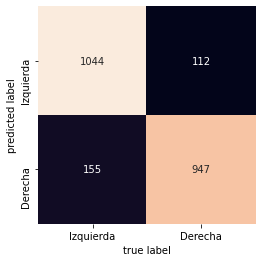

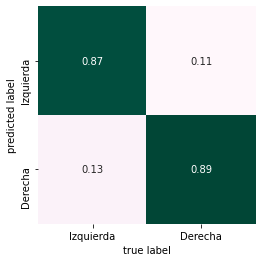

In [ ]:
predictions_SNN_izqdrch_2019 = fcmodel.predict(text_bow_test_NN_izqdrch_2019)
predicciones_SNN_izqdrch_2019 = []
for i in range(len(predictions_SNN_izqdrch_2019)):
    predicciones_SNN_izqdrch_2019.append(predictions_SNN_izqdrch_2019[i].argmax())
funcion_plot_tendencia_politica(predicciones_SNN_izqdrch_2019,y_test_NN_izqdrch_2019)

## Analisis Sentimental

Definimos la funcion de analisis sentimental de texto

In [ ]:
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    lb = score['compound']
    return lb



Vamos a llenar ahora la columna de sentimental analisis!

In [ ]:
for i in df['numero']:
  df['sentimental_value'][i]=sentiment_analyzer_scores(df['tweet_limpios_ingles'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Aqui definimos la funcion de extraccion de elementos de un determinado mes o semana y la extraccion de los valores en numpy array de los valores sentimentales

In [ ]:
def funcion_extraccion_año_mes_semana_subset(dataset,partido,año,mes=-1,semana=-1):
  auxiliar = dataset[dataset['nombre']==partido]
  if partido == 'todos': auxiliar = dataset

  auxiliar = auxiliar[auxiliar['año']==año]
  if semana==-1: return auxiliar[auxiliar['mes']==mes]
  if mes==-1: return auxiliar[auxiliar['semana']==semana]
  return -1

def sentimental_año_mes_semana(dataset,partido,año,mes=-1,semana=-1):
  return np.array(funcion_extraccion_año_mes_semana_subset(dataset,partido=partido,mes=mes,año=año,semana=semana)['sentimental_value'])

prueba = sentimental_año_mes_semana(df,partido='PSOE',semana=3,año=2019)
print(len(prueba))
print(prueba.mean())

77
0.31899090909090905


Aqui hay un ejemplo del analisis semanal, sale demasiado irregular... no se

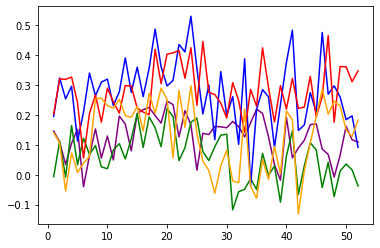

In [ ]:
def media(array):
  if len(array)==0: return 0
  return array.mean()

meses=np.linspace(1,52,52)
Podemos_sentimental_analisis_19_semanal = []
VOX_sentimental_analisis_19_semanal = []
PP_sentimental_analisis_19_semanal = []
PSOE_sentimental_analisis_19_semanal = []
Ciudadanos_sentimental_analisis_19_semanal = []

for i in meses:
  Podemos_sentimental_analisis_19_semanal.append(media(sentimental_año_mes_semana(df,partido='POD',semana=i,año=2019)))
  VOX_sentimental_analisis_19_semanal.append(media(sentimental_año_mes_semana(df,partido='VOX',semana=i,año=2019)))
  PP_sentimental_analisis_19_semanal.append(media(sentimental_año_mes_semana(df,partido='PP',semana=i,año=2019)))
  PSOE_sentimental_analisis_19_semanal.append(media(sentimental_año_mes_semana(df,partido='PSOE',semana=i,año=2019)))
  Ciudadanos_sentimental_analisis_19_semanal.append(media(sentimental_año_mes_semana(df,partido='CIU',semana=i,año=2019)))

plt.plot(meses,Podemos_sentimental_analisis_19_semanal,color='purple')
plt.plot(meses,VOX_sentimental_analisis_19_semanal,color='green')
plt.plot(meses,PP_sentimental_analisis_19_semanal,color='blue')
plt.plot(meses,PSOE_sentimental_analisis_19_semanal,color='red')
plt.plot(meses,Ciudadanos_sentimental_analisis_19_semanal,color='orange')
plt.show()


El mensual sale mas estable

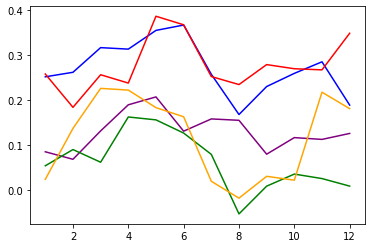

In [ ]:
meses=np.linspace(1,12,12)
Podemos_sentimental_analisis_19_mensual = []
VOX_sentimental_analisis_19_mensual = []
PP_sentimental_analisis_19_mensual = []
PSOE_sentimental_analisis_19_mensual = []
Ciudadanos_sentimental_analisis_19_mensual = []

for i in meses:
  Podemos_sentimental_analisis_19_mensual.append(media(sentimental_año_mes_semana(df,partido='POD',mes=i,año=2019)))
  VOX_sentimental_analisis_19_mensual.append(media(sentimental_año_mes_semana(df,partido='VOX',mes=i,año=2019)))
  PP_sentimental_analisis_19_mensual.append(media(sentimental_año_mes_semana(df,partido='PP',mes=i,año=2019)))
  PSOE_sentimental_analisis_19_mensual.append(media(sentimental_año_mes_semana(df,partido='PSOE',mes=i,año=2019)))
  Ciudadanos_sentimental_analisis_19_mensual.append(media(sentimental_año_mes_semana(df,partido='CIU',mes=i,año=2019)))


plt.plot(meses,Podemos_sentimental_analisis_19_mensual,color='purple')
plt.plot(meses,VOX_sentimental_analisis_19_mensual,color='green')
plt.plot(meses,PP_sentimental_analisis_19_mensual,color='blue')
plt.plot(meses,PSOE_sentimental_analisis_19_mensual,color='red')
plt.plot(meses,Ciudadanos_sentimental_analisis_19_mensual,color='orange')
plt.show()




Y aqui los histogramas de sentimintos de los diferentes partidos politicos

In [ ]:
def funcion_ploteo_histogramas_año(df,partido,hist,año):
  if partido == 'POD': color = 'purple'
  if partido == 'PSOE': color = 'r'
  if partido == 'PP': color = 'b'
  if partido == 'VOX': color = 'g'
  if partido == 'CIU': color = 'orange'

  f, axes = plt.subplots(4, 3, figsize=(20, 20), sharex=True)
  sns.despine(left=True)
  mes = 0
  for i in range(4):
    for j in range(3):
      mes = mes + 1
      sns.distplot(sentimental_año_mes_semana(df,partido=partido,mes=mes,año=año), hist=hist, color=color, kde_kws={"shade": True}, ax=axes[i, j])
  plt.show()


def funcion_ploteo_histogramas_año_conjunto(df,año,hist):
  f, axes = plt.subplots(4, 3, figsize=(20, 20), sharex=True)
  sns.despine(left=True)
  mes = 0
  for i in range(4):
    for j in range(3):
      mes = mes + 1
      sns.distplot(sentimental_año_mes_semana(df,partido='POD',mes=mes,año=año), hist=hist, color='purple', kde_kws={"shade": True}, ax=axes[i, j])
      sns.distplot(sentimental_año_mes_semana(df,partido='PSOE',mes=mes,año=año), hist=hist, color='r', kde_kws={"shade": True}, ax=axes[i, j])
      sns.distplot(sentimental_año_mes_semana(df,partido='PP',mes=mes,año=año), hist=hist, color='b', kde_kws={"shade": True}, ax=axes[i, j])
      sns.distplot(sentimental_año_mes_semana(df,partido='VOX',mes=mes,año=año), hist=hist, color='g', kde_kws={"shade": True}, ax=axes[i, j])
      sns.distplot(sentimental_año_mes_semana(df,partido='CIU',mes=mes,año=año), hist=hist, color='orange', kde_kws={"shade": True}, ax=axes[i, j])
  plt.show()



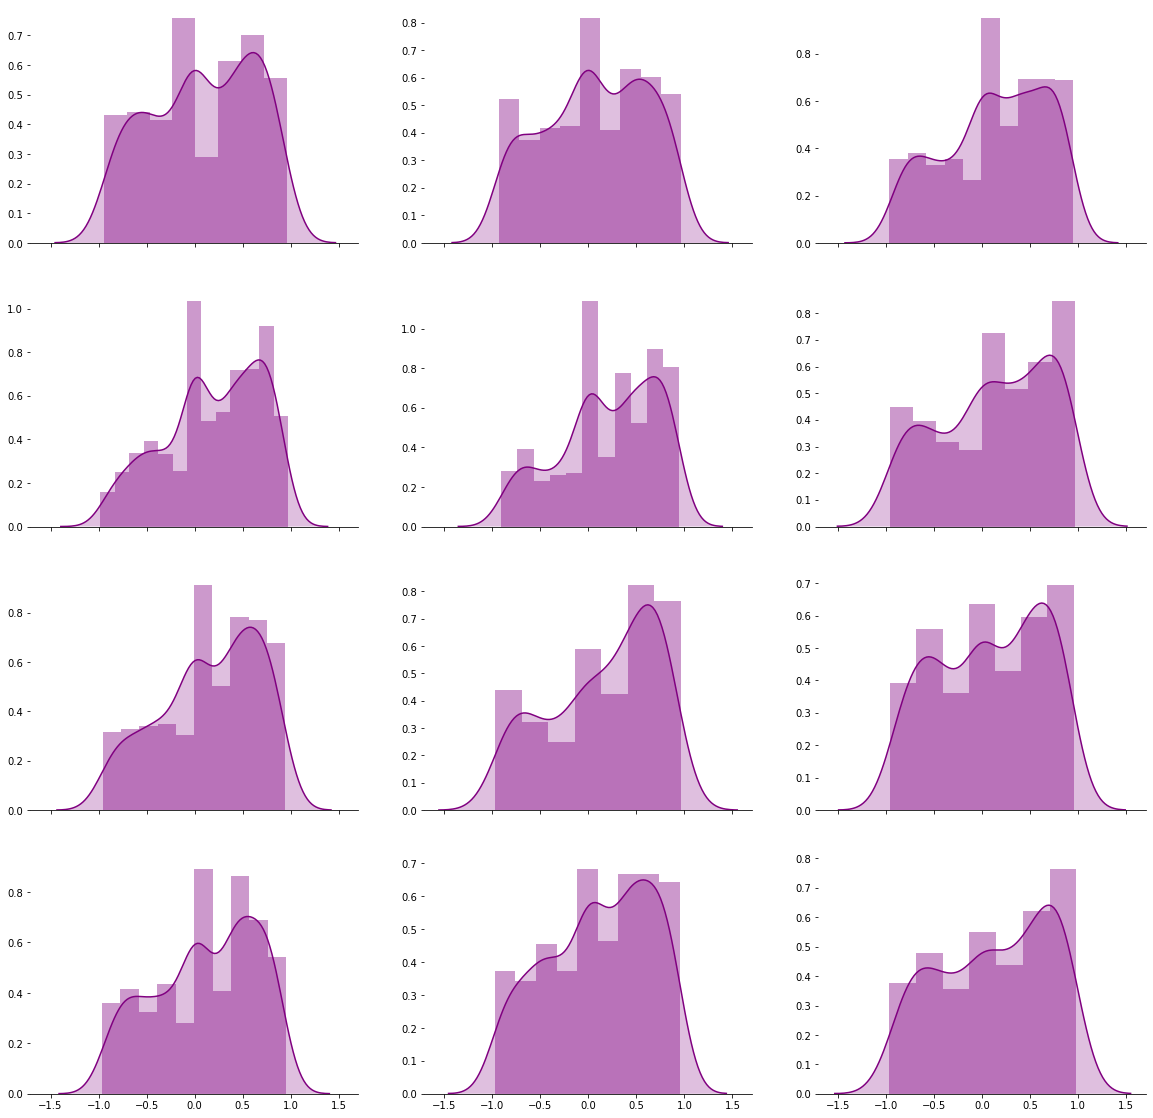

In [ ]:
funcion_ploteo_histogramas_año(df,partido='POD',año=2019,hist=True)

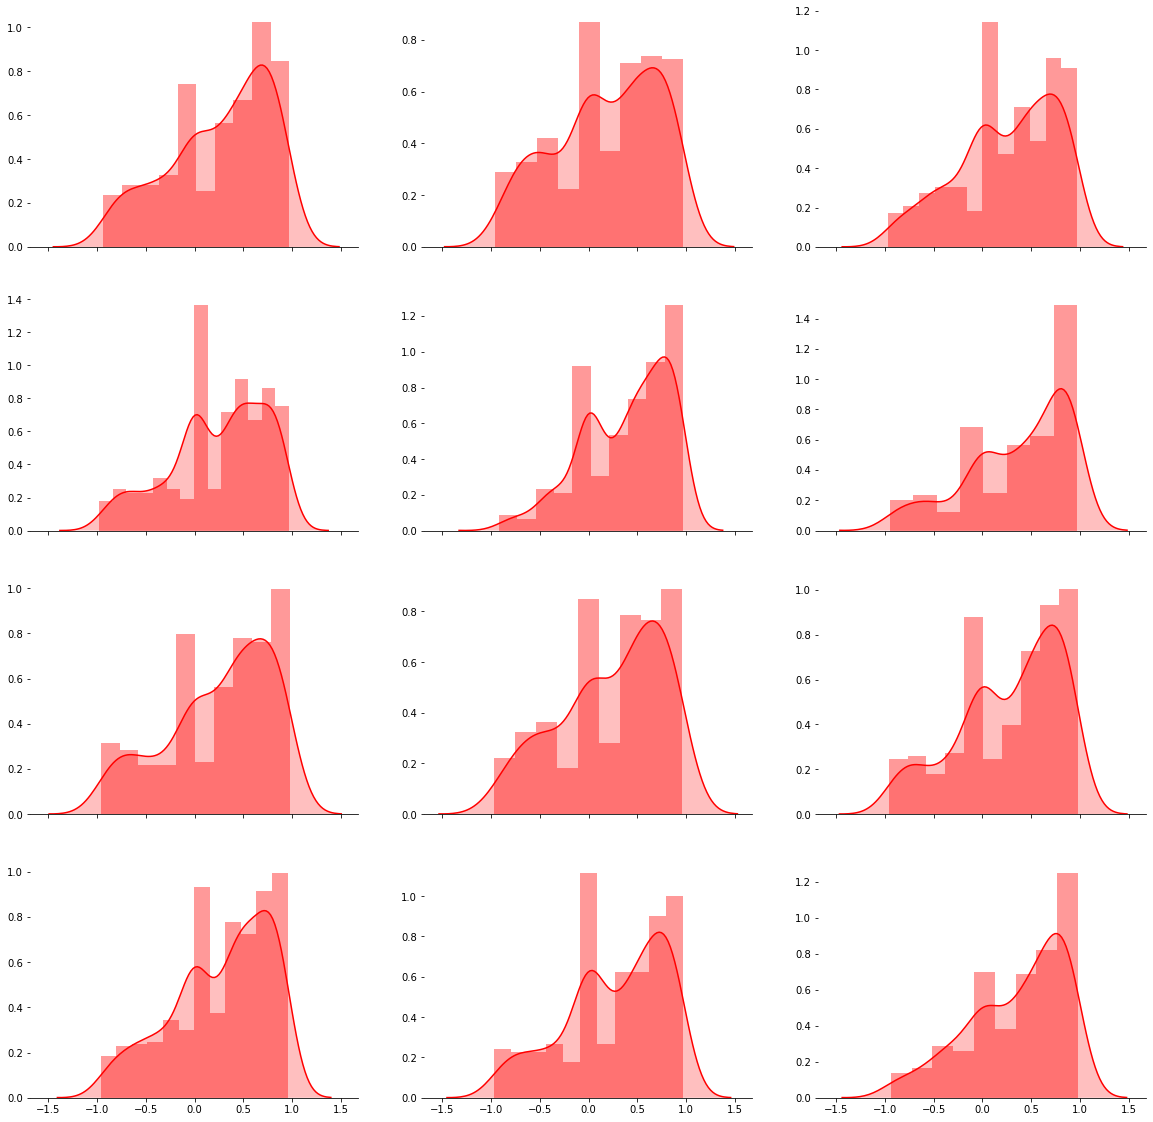

In [ ]:
funcion_ploteo_histogramas_año(df,partido='PSOE',año=2019,hist=True)

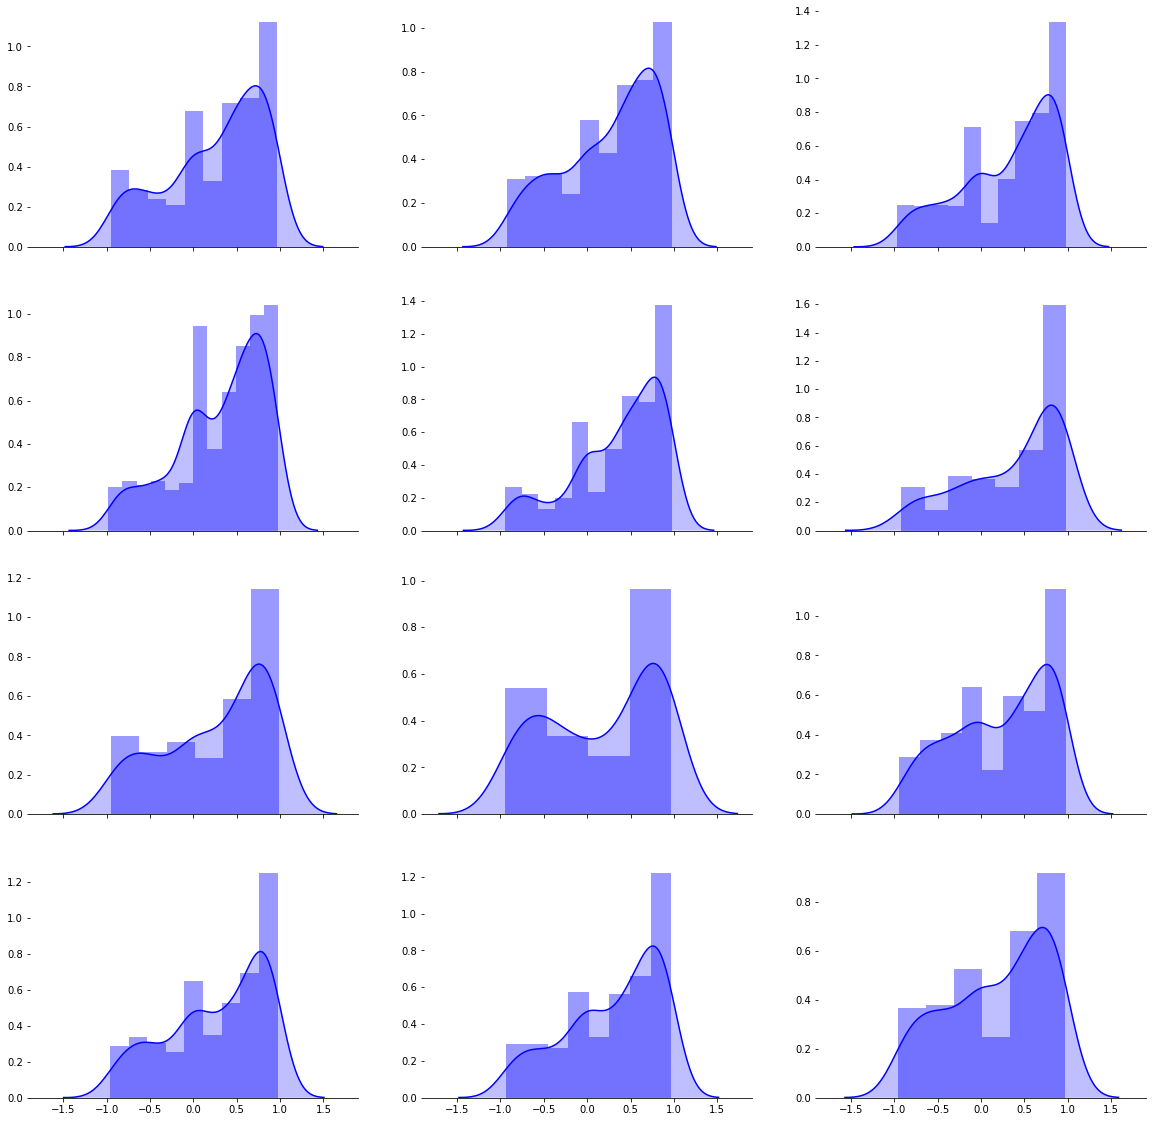

In [ ]:
funcion_ploteo_histogramas_año(df,partido='PP',año=2019,hist=True)

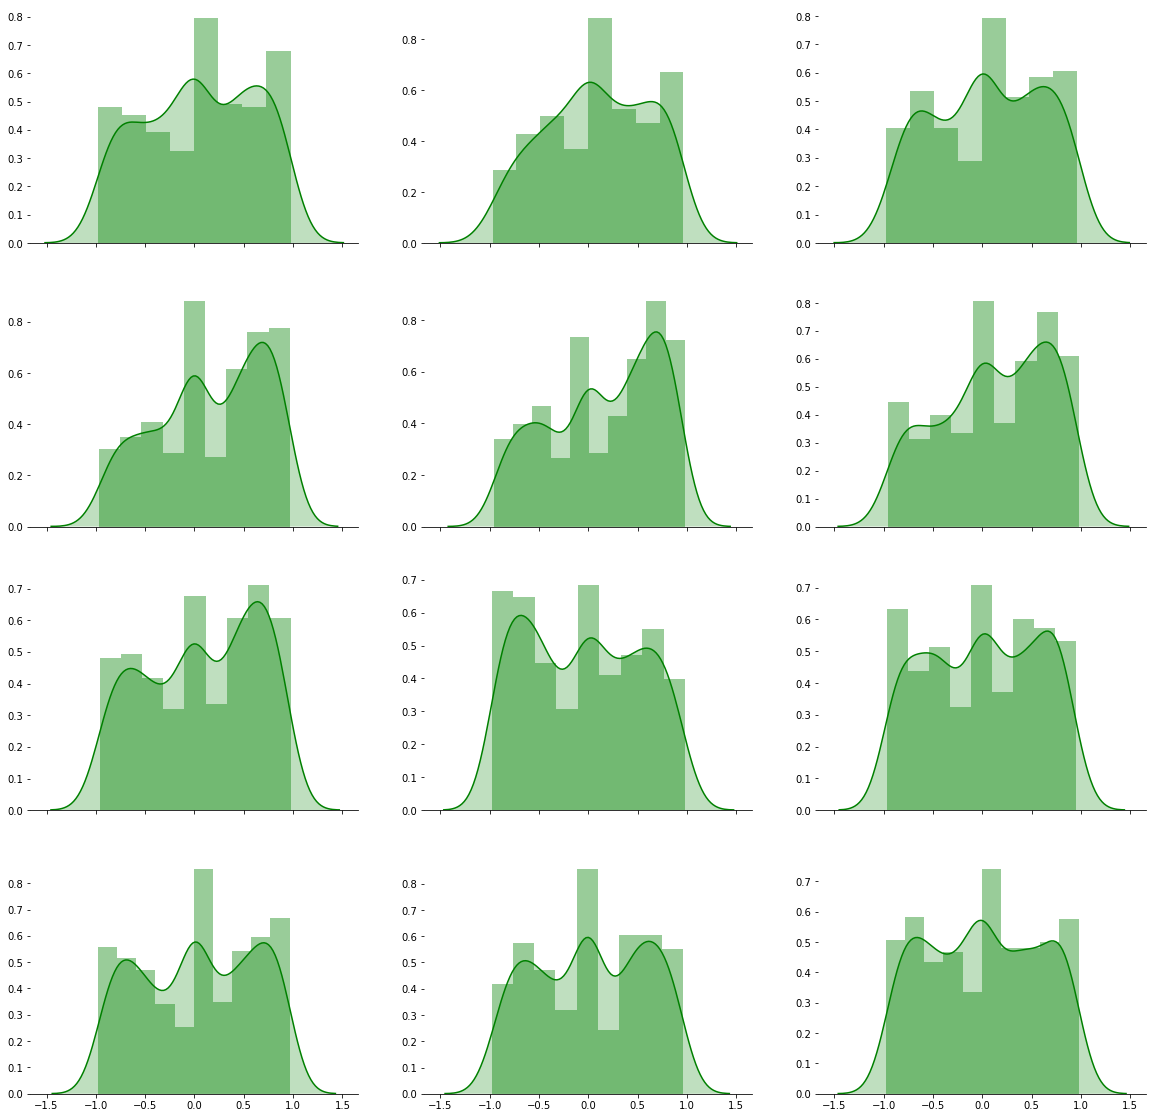

In [ ]:
funcion_ploteo_histogramas_año(df,partido='VOX',año=2019,hist=True)

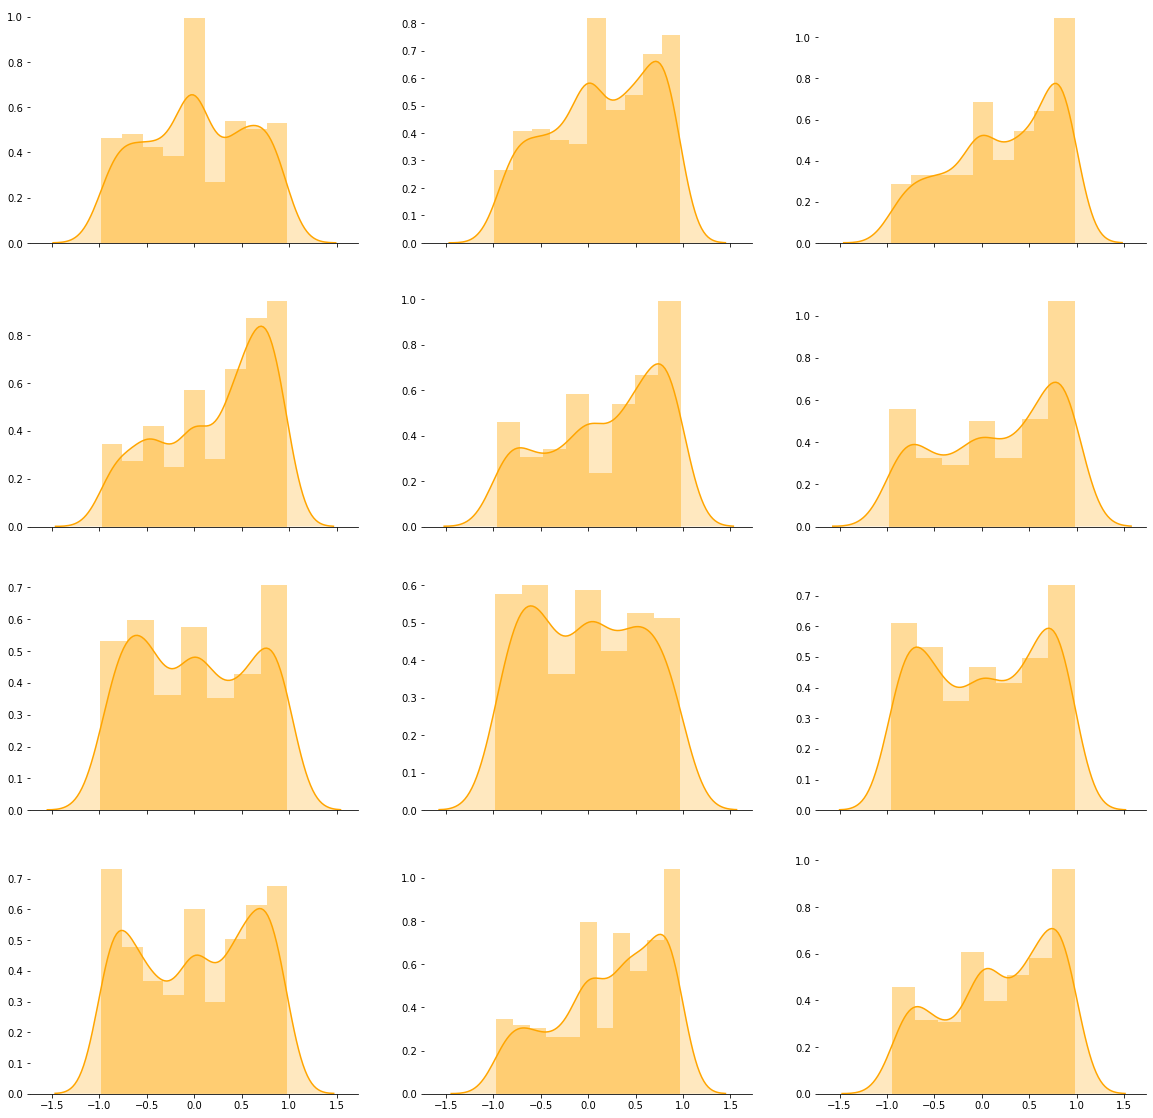

In [ ]:
funcion_ploteo_histogramas_año(df,partido='CIU',año=2019,hist=True)

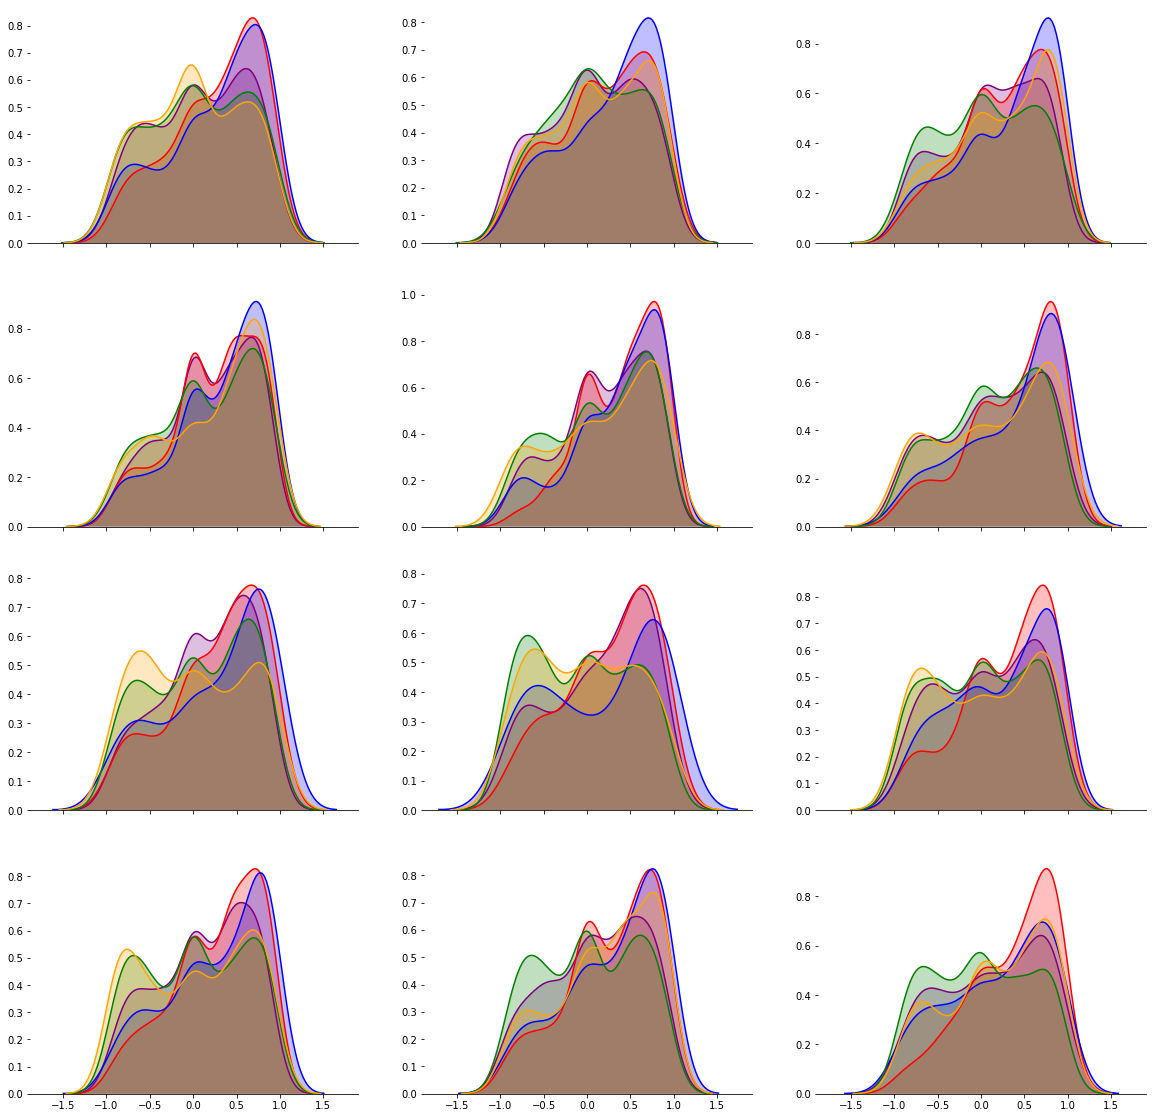

In [ ]:
funcion_ploteo_histogramas_año_conjunto(df,año=2019,hist=False)

In [ ]:
def analizador_gausiana(data):
  modificado_a_float = np.array(data, dtype=float)
  (mu, sigma) = stats.norm.fit(modificado_a_float)
  return mu, sigma

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:291: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:296: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


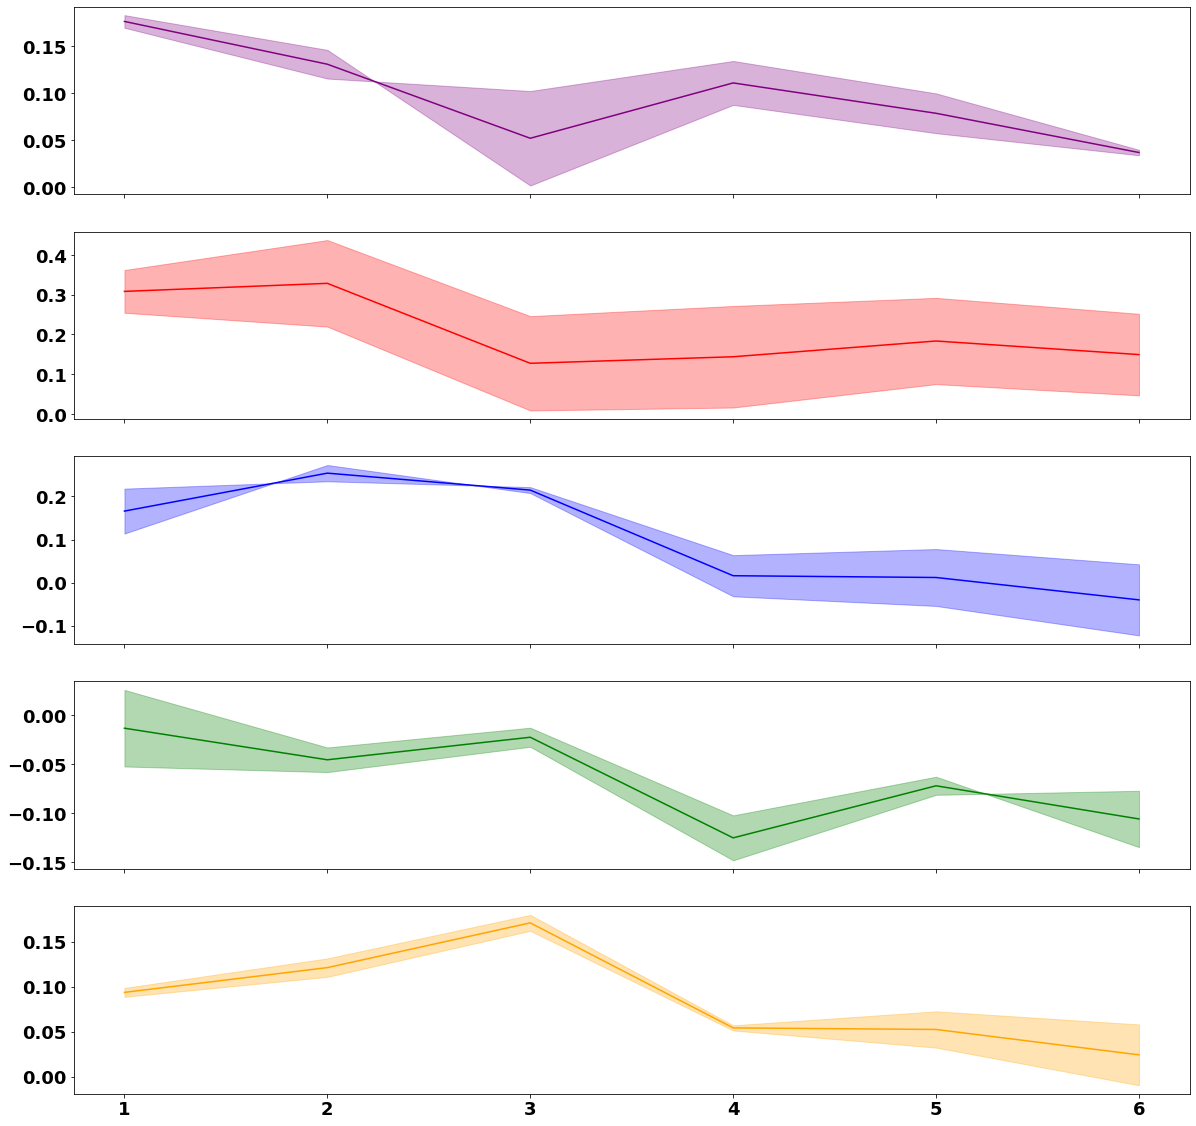

In [ ]:


meses=np.linspace(1,12,12)
Podemos_sentimental_analisis_20_mensual_mu = []
VOX_sentimental_analisis_20_mensual_mu = []
PP_sentimental_analisis_20_mensual_mu = []
PSOE_sentimental_analisis_20_mensual_mu = []
Ciudadanos_sentimental_analisis_20_mensual_mu = []

Podemos_sentimental_analisis_20_mensual_sigma = []
VOX_sentimental_analisis_20_mensual_sigma = []
PP_sentimental_analisis_20_mensual_sigma = []
PSOE_sentimental_analisis_20_mensual_sigma = []
Ciudadanos_sentimental_analisis_20_mensual_sigma = []

for i in meses:
  mu_global,sigma_global = analizador_gausiana(sentimental_año_mes_semana(df,partido='todos',mes=i,año=2020))

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='POD',mes=i,año=2020))
  Podemos_sentimental_analisis_20_mensual_mu.append(mu)
  Podemos_sentimental_analisis_20_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='PSOE',mes=i,año=2020))
  PSOE_sentimental_analisis_20_mensual_mu.append(mu)
  PSOE_sentimental_analisis_20_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='PP',mes=i,año=2020))
  PP_sentimental_analisis_20_mensual_mu.append(mu)
  PP_sentimental_analisis_20_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='VOX',mes=i,año=2020))
  VOX_sentimental_analisis_20_mensual_mu.append(mu)
  VOX_sentimental_analisis_20_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='CIU',mes=i,año=2020))
  Ciudadanos_sentimental_analisis_20_mensual_mu.append(mu)
  Ciudadanos_sentimental_analisis_20_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  
  
f, axes = plt.subplots(5, figsize=(20, 20), sharex=True)
axes[0].plot(meses,np.array(Podemos_sentimental_analisis_20_mensual_mu),color='purple')
axes[0].fill_between(meses,np.array(Podemos_sentimental_analisis_20_mensual_mu) + np.array(Podemos_sentimental_analisis_20_mensual_sigma),np.array(Podemos_sentimental_analisis_20_mensual_mu) - np.array(Podemos_sentimental_analisis_20_mensual_sigma),color='purple',alpha = 0.3)

axes[1].plot(meses,np.array(PSOE_sentimental_analisis_20_mensual_mu),color='red')
axes[1].fill_between(meses,np.array(PSOE_sentimental_analisis_20_mensual_mu) + np.array(PSOE_sentimental_analisis_20_mensual_sigma),np.array(PSOE_sentimental_analisis_20_mensual_mu) - np.array(PSOE_sentimental_analisis_20_mensual_sigma),color='red',alpha = 0.3)

axes[2].plot(meses,np.array(PP_sentimental_analisis_20_mensual_mu),color='blue')
axes[2].fill_between(meses,np.array(PP_sentimental_analisis_20_mensual_mu) + np.array(PP_sentimental_analisis_20_mensual_sigma),np.array(PP_sentimental_analisis_20_mensual_mu) - np.array(PP_sentimental_analisis_20_mensual_sigma),color='blue',alpha = 0.3)

axes[3].plot(meses,np.array(VOX_sentimental_analisis_20_mensual_mu),color='green')
axes[3].fill_between(meses,np.array(VOX_sentimental_analisis_20_mensual_mu) + np.array(VOX_sentimental_analisis_20_mensual_sigma),np.array(VOX_sentimental_analisis_20_mensual_mu) - np.array(VOX_sentimental_analisis_20_mensual_sigma),color='green',alpha = 0.3)

axes[4].plot(meses,np.array(Ciudadanos_sentimental_analisis_20_mensual_mu),color='orange')
axes[4].fill_between(meses,np.array(Ciudadanos_sentimental_analisis_20_mensual_mu) + np.array(Ciudadanos_sentimental_analisis_20_mensual_sigma),np.array(Ciudadanos_sentimental_analisis_20_mensual_mu) - np.array(Ciudadanos_sentimental_analisis_20_mensual_sigma),color='orange',alpha = 0.3)


plt.show()


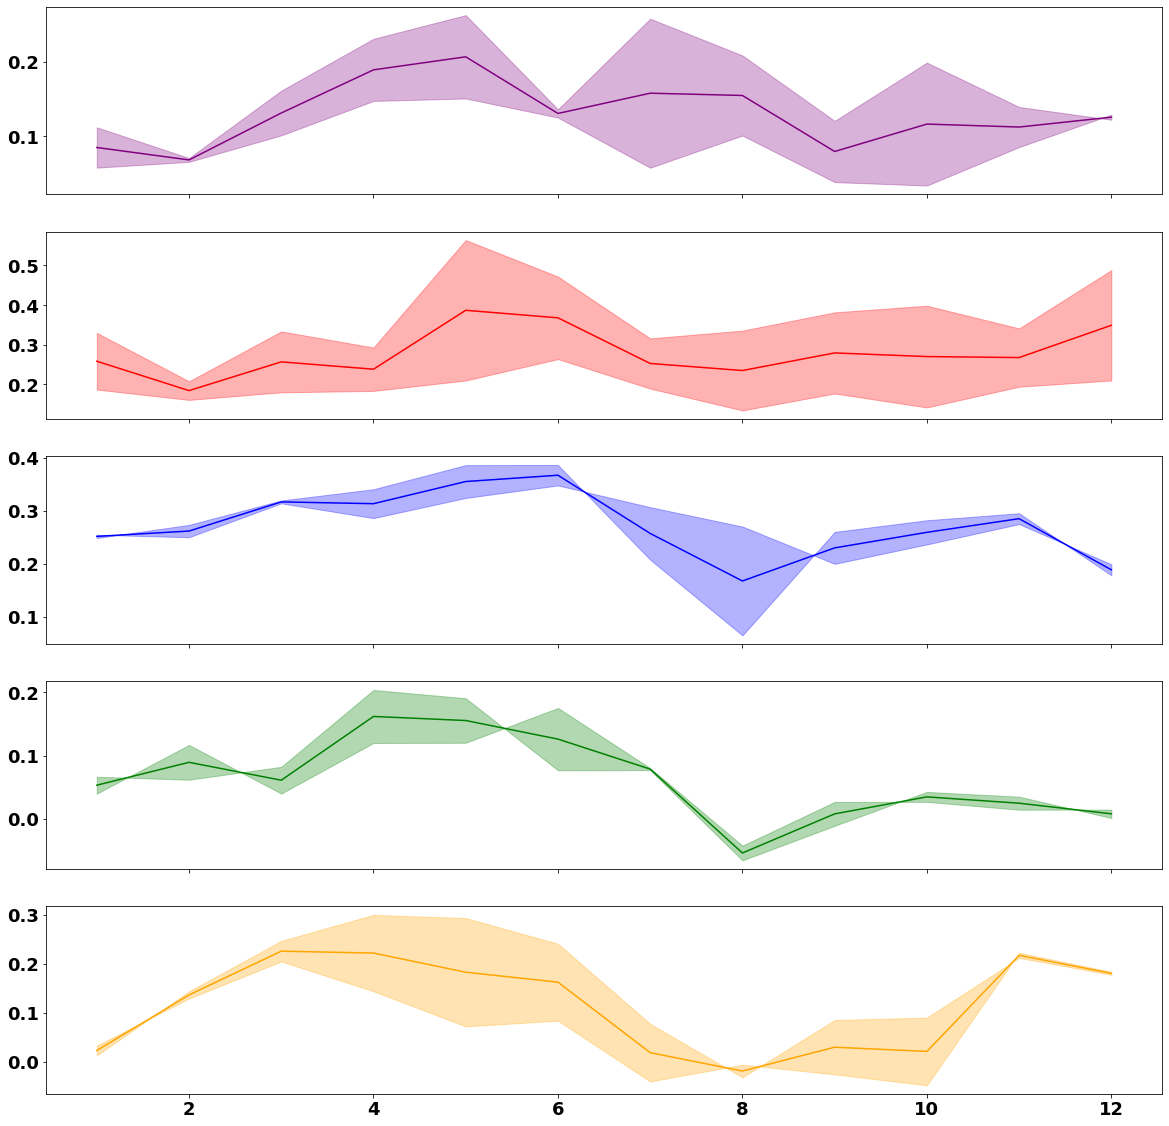

In [ ]:
meses=np.linspace(1,12,12)
Podemos_sentimental_analisis_19_mensual_mu = []
VOX_sentimental_analisis_19_mensual_mu = []
PP_sentimental_analisis_19_mensual_mu = []
PSOE_sentimental_analisis_19_mensual_mu = []
Ciudadanos_sentimental_analisis_19_mensual_mu = []

Podemos_sentimental_analisis_19_mensual_sigma = []
VOX_sentimental_analisis_19_mensual_sigma = []
PP_sentimental_analisis_19_mensual_sigma = []
PSOE_sentimental_analisis_19_mensual_sigma = []
Ciudadanos_sentimental_analisis_19_mensual_sigma = []

for i in meses:
  mu_global,sigma_global = analizador_gausiana(sentimental_año_mes_semana(df,partido='todos',mes=i,año=2019))

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='POD',mes=i,año=2019))
  Podemos_sentimental_analisis_19_mensual_mu.append(mu)
  Podemos_sentimental_analisis_19_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='PSOE',mes=i,año=2019))
  PSOE_sentimental_analisis_19_mensual_mu.append(mu)
  PSOE_sentimental_analisis_19_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='PP',mes=i,año=2019))
  PP_sentimental_analisis_19_mensual_mu.append(mu)
  PP_sentimental_analisis_19_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='VOX',mes=i,año=2019))
  VOX_sentimental_analisis_19_mensual_mu.append(mu)
  VOX_sentimental_analisis_19_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='CIU',mes=i,año=2019))
  Ciudadanos_sentimental_analisis_19_mensual_mu.append(mu)
  Ciudadanos_sentimental_analisis_19_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  
  
f, axes = plt.subplots(5, figsize=(20, 20), sharex=True)
axes[0].plot(meses,np.array(Podemos_sentimental_analisis_19_mensual_mu),color='purple')
axes[0].fill_between(meses,np.array(Podemos_sentimental_analisis_19_mensual_mu) + np.array(Podemos_sentimental_analisis_19_mensual_sigma),np.array(Podemos_sentimental_analisis_19_mensual_mu) - np.array(Podemos_sentimental_analisis_19_mensual_sigma),color='purple',alpha = 0.3)

axes[1].plot(meses,np.array(PSOE_sentimental_analisis_19_mensual_mu),color='red')
axes[1].fill_between(meses,np.array(PSOE_sentimental_analisis_19_mensual_mu) + np.array(PSOE_sentimental_analisis_19_mensual_sigma),np.array(PSOE_sentimental_analisis_19_mensual_mu) - np.array(PSOE_sentimental_analisis_19_mensual_sigma),color='red',alpha = 0.3)

axes[2].plot(meses,np.array(PP_sentimental_analisis_19_mensual_mu),color='blue')
axes[2].fill_between(meses,np.array(PP_sentimental_analisis_19_mensual_mu) + np.array(PP_sentimental_analisis_19_mensual_sigma),np.array(PP_sentimental_analisis_19_mensual_mu) - np.array(PP_sentimental_analisis_19_mensual_sigma),color='blue',alpha = 0.3)

axes[3].plot(meses,np.array(VOX_sentimental_analisis_19_mensual_mu),color='green')
axes[3].fill_between(meses,np.array(VOX_sentimental_analisis_19_mensual_mu) + np.array(VOX_sentimental_analisis_19_mensual_sigma),np.array(VOX_sentimental_analisis_19_mensual_mu) - np.array(VOX_sentimental_analisis_19_mensual_sigma),color='green',alpha = 0.3)

axes[4].plot(meses,np.array(Ciudadanos_sentimental_analisis_19_mensual_mu),color='orange')
axes[4].fill_between(meses,np.array(Ciudadanos_sentimental_analisis_19_mensual_mu) + np.array(Ciudadanos_sentimental_analisis_19_mensual_sigma),np.array(Ciudadanos_sentimental_analisis_19_mensual_mu) - np.array(Ciudadanos_sentimental_analisis_19_mensual_sigma),color='orange',alpha = 0.3)


plt.show()

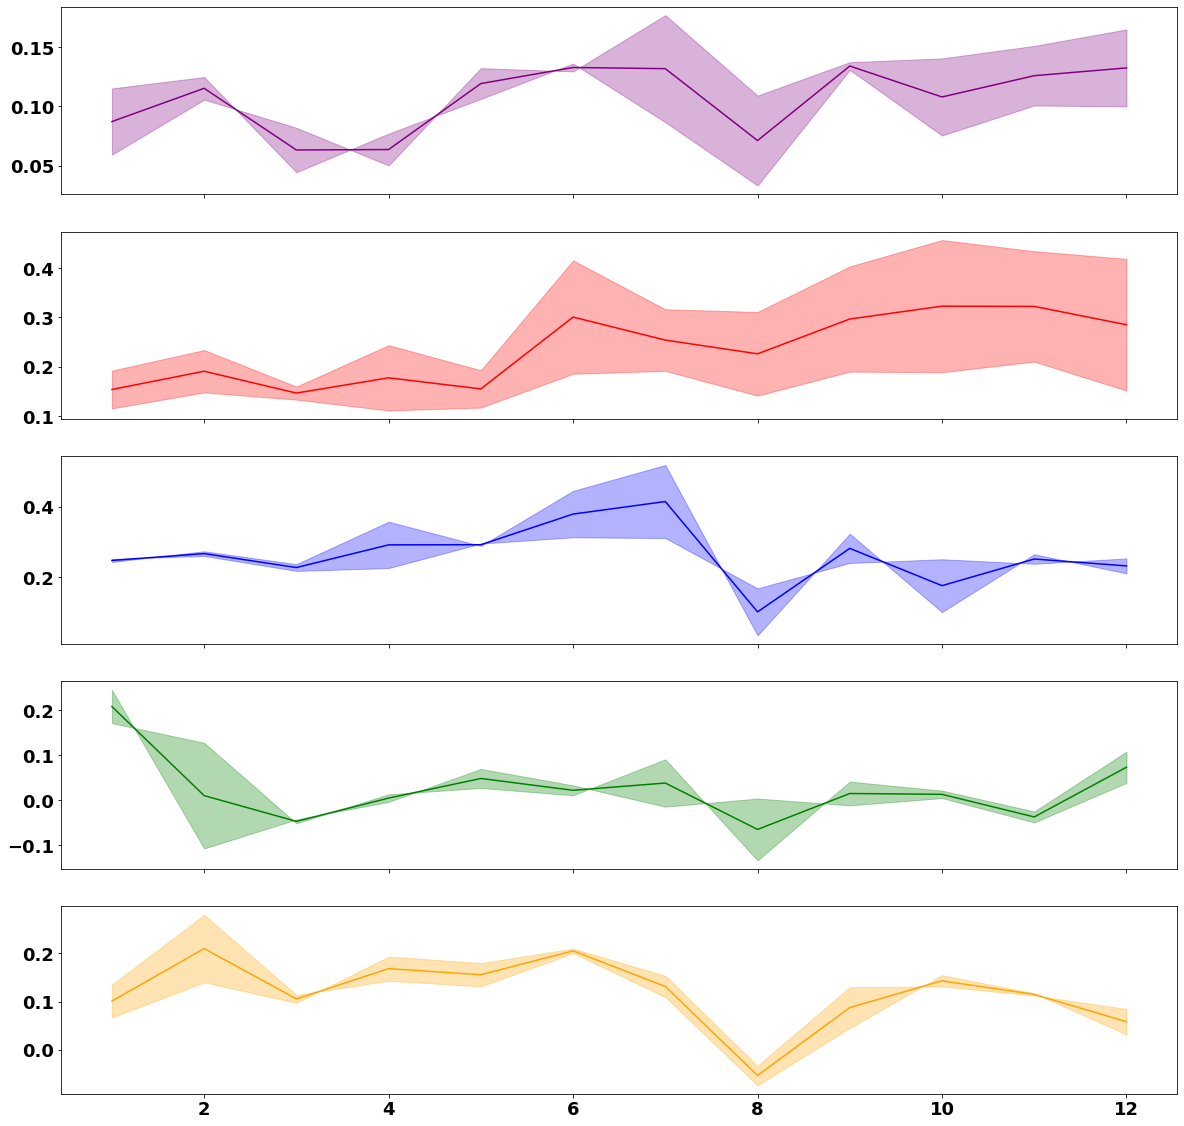

In [ ]:
meses=np.linspace(1,12,12)
Podemos_sentimental_analisis_18_mensual_mu = []
VOX_sentimental_analisis_18_mensual_mu = []
PP_sentimental_analisis_18_mensual_mu = []
PSOE_sentimental_analisis_18_mensual_mu = []
Ciudadanos_sentimental_analisis_18_mensual_mu = []

Podemos_sentimental_analisis_18_mensual_sigma = []
VOX_sentimental_analisis_18_mensual_sigma = []
PP_sentimental_analisis_18_mensual_sigma = []
PSOE_sentimental_analisis_18_mensual_sigma = []
Ciudadanos_sentimental_analisis_18_mensual_sigma = []

for i in meses:
  mu_global,sigma_global = analizador_gausiana(sentimental_año_mes_semana(df,partido='todos',mes=i,año=2018))

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='POD',mes=i,año=2018))
  Podemos_sentimental_analisis_18_mensual_mu.append(mu)
  Podemos_sentimental_analisis_18_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='PSOE',mes=i,año=2018))
  PSOE_sentimental_analisis_18_mensual_mu.append(mu)
  PSOE_sentimental_analisis_18_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='PP',mes=i,año=2018))
  PP_sentimental_analisis_18_mensual_mu.append(mu)
  PP_sentimental_analisis_18_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='VOX',mes=i,año=2018))
  VOX_sentimental_analisis_18_mensual_mu.append(mu)
  VOX_sentimental_analisis_18_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='CIU',mes=i,año=2018))
  Ciudadanos_sentimental_analisis_18_mensual_mu.append(mu)
  Ciudadanos_sentimental_analisis_18_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  
  
f, axes = plt.subplots(5, figsize=(20, 20), sharex=True)
axes[0].plot(meses,np.array(Podemos_sentimental_analisis_18_mensual_mu),color='purple')
axes[0].fill_between(meses,np.array(Podemos_sentimental_analisis_18_mensual_mu) + np.array(Podemos_sentimental_analisis_18_mensual_sigma),np.array(Podemos_sentimental_analisis_18_mensual_mu) - np.array(Podemos_sentimental_analisis_18_mensual_sigma),color='purple',alpha = 0.3)

axes[1].plot(meses,np.array(PSOE_sentimental_analisis_18_mensual_mu),color='red')
axes[1].fill_between(meses,np.array(PSOE_sentimental_analisis_18_mensual_mu) + np.array(PSOE_sentimental_analisis_18_mensual_sigma),np.array(PSOE_sentimental_analisis_18_mensual_mu) - np.array(PSOE_sentimental_analisis_18_mensual_sigma),color='red',alpha = 0.3)

axes[2].plot(meses,np.array(PP_sentimental_analisis_18_mensual_mu),color='blue')
axes[2].fill_between(meses,np.array(PP_sentimental_analisis_18_mensual_mu) + np.array(PP_sentimental_analisis_18_mensual_sigma),np.array(PP_sentimental_analisis_18_mensual_mu) - np.array(PP_sentimental_analisis_18_mensual_sigma),color='blue',alpha = 0.3)

axes[3].plot(meses,np.array(VOX_sentimental_analisis_18_mensual_mu),color='green')
axes[3].fill_between(meses,np.array(VOX_sentimental_analisis_18_mensual_mu) + np.array(VOX_sentimental_analisis_18_mensual_sigma),np.array(VOX_sentimental_analisis_18_mensual_mu) - np.array(VOX_sentimental_analisis_18_mensual_sigma),color='green',alpha = 0.3)

axes[4].plot(meses,np.array(Ciudadanos_sentimental_analisis_18_mensual_mu),color='orange')
axes[4].fill_between(meses,np.array(Ciudadanos_sentimental_analisis_18_mensual_mu) + np.array(Ciudadanos_sentimental_analisis_18_mensual_sigma),np.array(Ciudadanos_sentimental_analisis_18_mensual_mu) - np.array(Ciudadanos_sentimental_analisis_18_mensual_sigma),color='orange',alpha = 0.3)


plt.show()

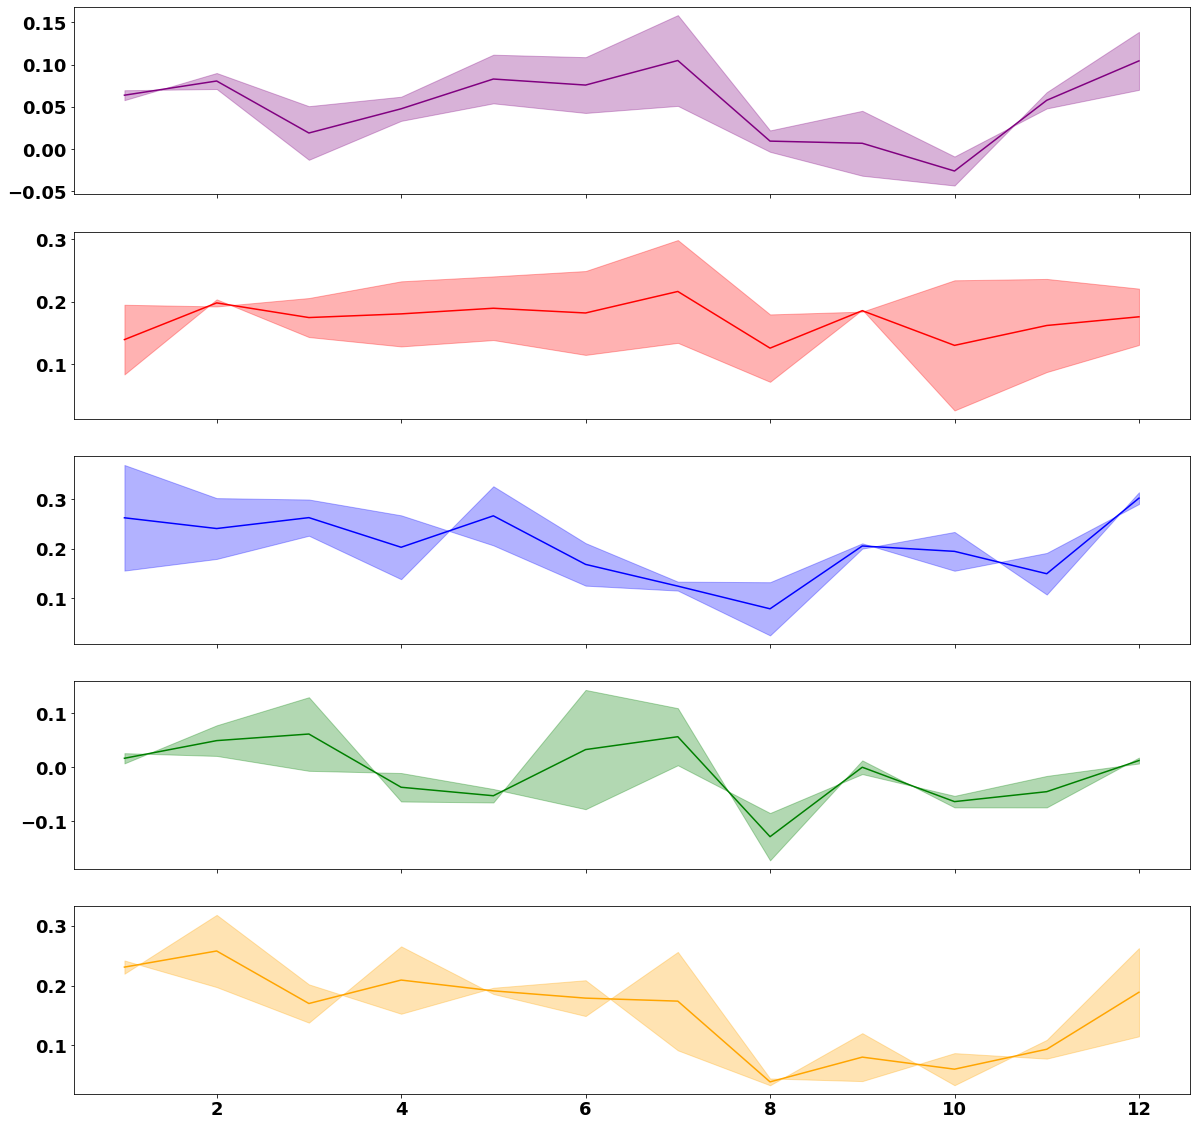

In [ ]:
meses=np.linspace(1,12,12)
Podemos_sentimental_analisis_17_mensual_mu = []
VOX_sentimental_analisis_17_mensual_mu = []
PP_sentimental_analisis_17_mensual_mu = []
PSOE_sentimental_analisis_17_mensual_mu = []
Ciudadanos_sentimental_analisis_17_mensual_mu = []

Podemos_sentimental_analisis_17_mensual_sigma = []
VOX_sentimental_analisis_17_mensual_sigma = []
PP_sentimental_analisis_17_mensual_sigma = []
PSOE_sentimental_analisis_17_mensual_sigma = []
Ciudadanos_sentimental_analisis_17_mensual_sigma = []

for i in meses:
  mu_global,sigma_global = analizador_gausiana(sentimental_año_mes_semana(df,partido='todos',mes=i,año=2017))

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='POD',mes=i,año=2017))
  Podemos_sentimental_analisis_17_mensual_mu.append(mu)
  Podemos_sentimental_analisis_17_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='PSOE',mes=i,año=2017))
  PSOE_sentimental_analisis_17_mensual_mu.append(mu)
  PSOE_sentimental_analisis_17_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='PP',mes=i,año=2017))
  PP_sentimental_analisis_17_mensual_mu.append(mu)
  PP_sentimental_analisis_17_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='VOX',mes=i,año=2017))
  VOX_sentimental_analisis_17_mensual_mu.append(mu)
  VOX_sentimental_analisis_17_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='CIU',mes=i,año=2017))
  Ciudadanos_sentimental_analisis_17_mensual_mu.append(mu)
  Ciudadanos_sentimental_analisis_17_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  
  
f, axes = plt.subplots(5, figsize=(20, 20), sharex=True)
axes[0].plot(meses,np.array(Podemos_sentimental_analisis_17_mensual_mu),color='purple')
axes[0].fill_between(meses,np.array(Podemos_sentimental_analisis_17_mensual_mu) + np.array(Podemos_sentimental_analisis_17_mensual_sigma),np.array(Podemos_sentimental_analisis_17_mensual_mu) - np.array(Podemos_sentimental_analisis_17_mensual_sigma),color='purple',alpha = 0.3)

axes[1].plot(meses,np.array(PSOE_sentimental_analisis_17_mensual_mu),color='red')
axes[1].fill_between(meses,np.array(PSOE_sentimental_analisis_17_mensual_mu) + np.array(PSOE_sentimental_analisis_17_mensual_sigma),np.array(PSOE_sentimental_analisis_17_mensual_mu) - np.array(PSOE_sentimental_analisis_17_mensual_sigma),color='red',alpha = 0.3)

axes[2].plot(meses,np.array(PP_sentimental_analisis_17_mensual_mu),color='blue')
axes[2].fill_between(meses,np.array(PP_sentimental_analisis_17_mensual_mu) + np.array(PP_sentimental_analisis_17_mensual_sigma),np.array(PP_sentimental_analisis_17_mensual_mu) - np.array(PP_sentimental_analisis_17_mensual_sigma),color='blue',alpha = 0.3)

axes[3].plot(meses,np.array(VOX_sentimental_analisis_17_mensual_mu),color='green')
axes[3].fill_between(meses,np.array(VOX_sentimental_analisis_17_mensual_mu) + np.array(VOX_sentimental_analisis_17_mensual_sigma),np.array(VOX_sentimental_analisis_17_mensual_mu) - np.array(VOX_sentimental_analisis_17_mensual_sigma),color='green',alpha = 0.3)

axes[4].plot(meses,np.array(Ciudadanos_sentimental_analisis_17_mensual_mu),color='orange')
axes[4].fill_between(meses,np.array(Ciudadanos_sentimental_analisis_17_mensual_mu) + np.array(Ciudadanos_sentimental_analisis_17_mensual_sigma),np.array(Ciudadanos_sentimental_analisis_17_mensual_mu) - np.array(Ciudadanos_sentimental_analisis_17_mensual_sigma),color='orange',alpha = 0.3)


plt.show()

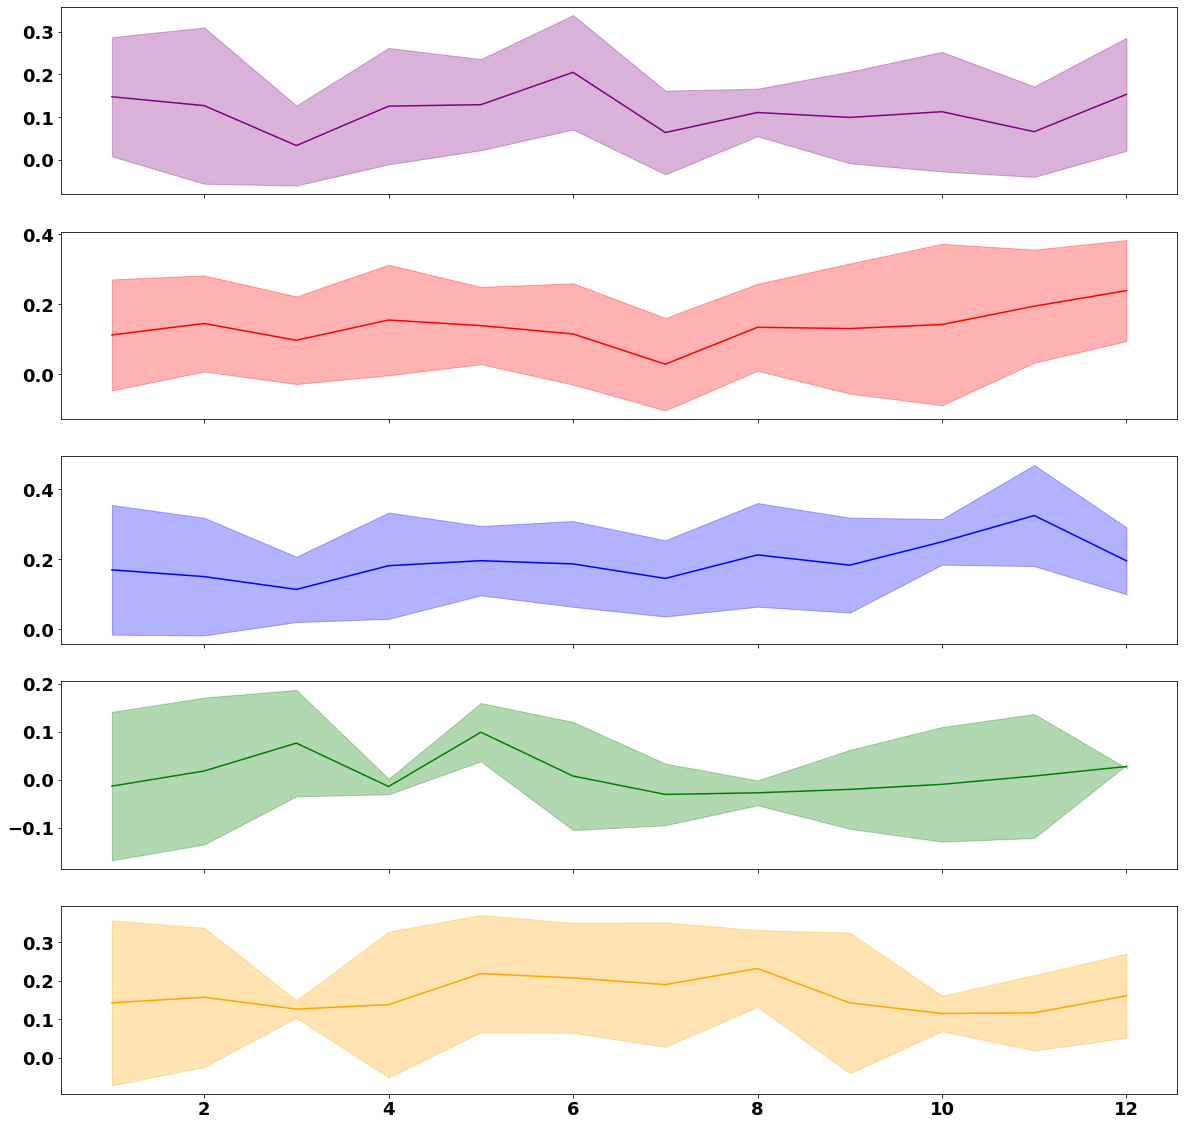

In [ ]:
meses=np.linspace(1,12,12)
Podemos_sentimental_analisis_16_mensual_mu = []
VOX_sentimental_analisis_16_mensual_mu = []
PP_sentimental_analisis_16_mensual_mu = []
PSOE_sentimental_analisis_16_mensual_mu = []
Ciudadanos_sentimental_analisis_16_mensual_mu = []

Podemos_sentimental_analisis_16_mensual_sigma = []
VOX_sentimental_analisis_16_mensual_sigma = []
PP_sentimental_analisis_16_mensual_sigma = []
PSOE_sentimental_analisis_16_mensual_sigma = []
Ciudadanos_sentimental_analisis_16_mensual_sigma = []

for i in meses:
  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='POD',mes=i,año=2016))
  Podemos_sentimental_analisis_16_mensual_mu.append(mu)
  Podemos_sentimental_analisis_16_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='PSOE',mes=i,año=2016))
  PSOE_sentimental_analisis_16_mensual_mu.append(mu)
  PSOE_sentimental_analisis_16_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='PP',mes=i,año=2016))
  PP_sentimental_analisis_16_mensual_mu.append(mu)
  PP_sentimental_analisis_16_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='VOX',mes=i,año=2016))
  VOX_sentimental_analisis_16_mensual_mu.append(mu)
  VOX_sentimental_analisis_16_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  mu,sigma = analizador_gausiana(sentimental_año_mes_semana(df,partido='CIU',mes=i,año=2016))
  Ciudadanos_sentimental_analisis_16_mensual_mu.append(mu)
  Ciudadanos_sentimental_analisis_16_mensual_sigma.append(1.0 - sigma*1.0/sigma_global)

  
  
f, axes = plt.subplots(5, figsize=(20, 20), sharex=True)

mu_global,sigma_global = analizador_gausiana(sentimental_año_mes_semana(df,partido='todos',mes=i,año=2016))

axes[0].plot(meses,np.array(Podemos_sentimental_analisis_16_mensual_mu),color='purple')
axes[0].fill_between(meses,np.array(Podemos_sentimental_analisis_16_mensual_mu) + np.array(Podemos_sentimental_analisis_16_mensual_sigma),np.array(Podemos_sentimental_analisis_16_mensual_mu) - np.array(Podemos_sentimental_analisis_16_mensual_sigma),color='purple',alpha = 0.3)

axes[1].plot(meses,np.array(PSOE_sentimental_analisis_16_mensual_mu),color='red')
axes[1].fill_between(meses,np.array(PSOE_sentimental_analisis_16_mensual_mu) + np.array(PSOE_sentimental_analisis_16_mensual_sigma),np.array(PSOE_sentimental_analisis_16_mensual_mu) - np.array(PSOE_sentimental_analisis_16_mensual_sigma),color='red',alpha = 0.3)

axes[2].plot(meses,np.array(PP_sentimental_analisis_16_mensual_mu),color='blue')
axes[2].fill_between(meses,np.array(PP_sentimental_analisis_16_mensual_mu) + np.array(PP_sentimental_analisis_16_mensual_sigma),np.array(PP_sentimental_analisis_16_mensual_mu) - np.array(PP_sentimental_analisis_16_mensual_sigma),color='blue',alpha = 0.3)

axes[3].plot(meses,np.array(VOX_sentimental_analisis_16_mensual_mu),color='green')
axes[3].fill_between(meses,np.array(VOX_sentimental_analisis_16_mensual_mu) + np.array(VOX_sentimental_analisis_16_mensual_sigma),np.array(VOX_sentimental_analisis_16_mensual_mu) - np.array(VOX_sentimental_analisis_16_mensual_sigma),color='green',alpha = 0.3)

axes[4].plot(meses,np.array(Ciudadanos_sentimental_analisis_16_mensual_mu),color='orange')
axes[4].fill_between(meses,np.array(Ciudadanos_sentimental_analisis_16_mensual_mu) + np.array(Ciudadanos_sentimental_analisis_16_mensual_sigma),np.array(Ciudadanos_sentimental_analisis_16_mensual_mu) - np.array(Ciudadanos_sentimental_analisis_16_mensual_sigma),color='orange',alpha = 0.3)


plt.show()

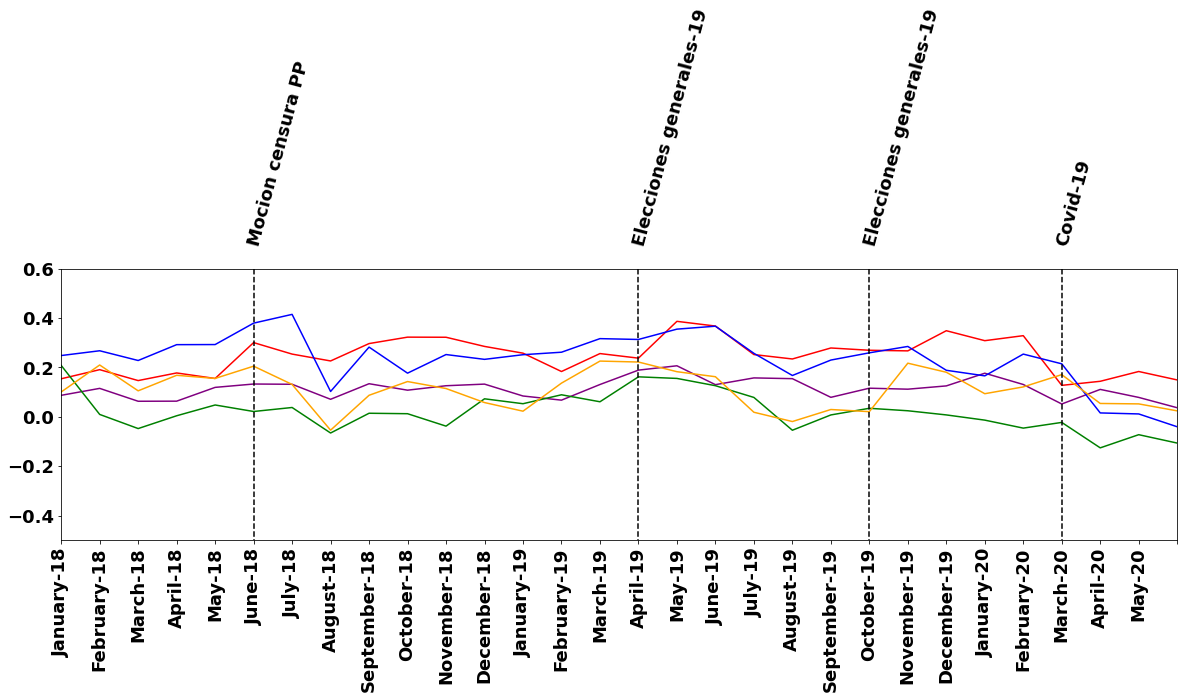

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
import matplotlib
matplotlib.rc('font', **font)

f, ax = plt.subplots(1, figsize=(20, 5))
meses=np.linspace(1,36,36)
meses_name = ['','January-18', 'February-18', 'March-18','April-18','May-18','June-18','July-18','August-18','September-18','October-18','November-18','December-18','January-19', 'February-19', 'March-19','April-19','May-19','June-19','July-19','August-19','September-19','October-19','November-19','December-19','January-20', 'February-20', 'March-20','April-20','May-20']

Podemos181920 = Podemos_sentimental_analisis_18_mensual_mu + Podemos_sentimental_analisis_19_mensual_mu + Podemos_sentimental_analisis_20_mensual_mu
VOX181920 = VOX_sentimental_analisis_18_mensual_mu + VOX_sentimental_analisis_19_mensual_mu + VOX_sentimental_analisis_20_mensual_mu
PSOE181920 = PSOE_sentimental_analisis_18_mensual_mu + PSOE_sentimental_analisis_19_mensual_mu + PSOE_sentimental_analisis_20_mensual_mu
PP181920 = PP_sentimental_analisis_18_mensual_mu + PP_sentimental_analisis_19_mensual_mu + PP_sentimental_analisis_20_mensual_mu
Ciudadanos181920 = Ciudadanos_sentimental_analisis_18_mensual_mu + Ciudadanos_sentimental_analisis_19_mensual_mu + Ciudadanos_sentimental_analisis_20_mensual_mu

ax.plot(meses,np.array(Podemos181920),color='purple')
ax.plot(meses,np.array(PSOE181920),color='red')
ax.plot(meses,np.array(PP181920),color='blue')
ax.plot(meses,np.array(VOX181920),color='green')
ax.plot(meses,np.array(Ciudadanos181920),color='orange')
plt.ylim(-0.5,0.6)
plt.xlim(1,30)

#sucesos

ax.plot([6,6], [-1,1],color = 'black', linestyle='--')
ax.text(5.8,0.7,'Mocion censura PP',rotation=75,fontsize=18)

ax.plot([27,27], [-1,1],color = 'black', linestyle='--')
ax.text(26.8,0.7,'Covid-19',rotation=75,fontsize=18)

ax.plot([16,16], [-1,1],color = 'black', linestyle='--')
ax.text(15.8,0.7,'Elecciones generales-19',rotation=75,fontsize=18)

ax.plot([22,22], [-1,1],color = 'black', linestyle='--')
ax.text(21.8,0.7,'Elecciones generales-19',rotation=75,fontsize=18)

ax.tick_params(left=True, labelleft=True, bottom=True, labelbottom=True, top=False, labeltop=False)
#secax = ax.secondary_xaxis('top',functions=([1,2], [1,2]))
plt.xticks(np.linspace(1,30,30), ['January-18', 'February-18', 'March-18','April-18','May-18','June-18','July-18','August-18','September-18','October-18','November-18','December-18','January-19', 'February-19', 'March-19','April-19','May-19','June-19','July-19','August-19','September-19','October-19','November-19','December-19','January-20', 'February-20', 'March-20','April-20','May-20'], rotation=90) 

plt.show()

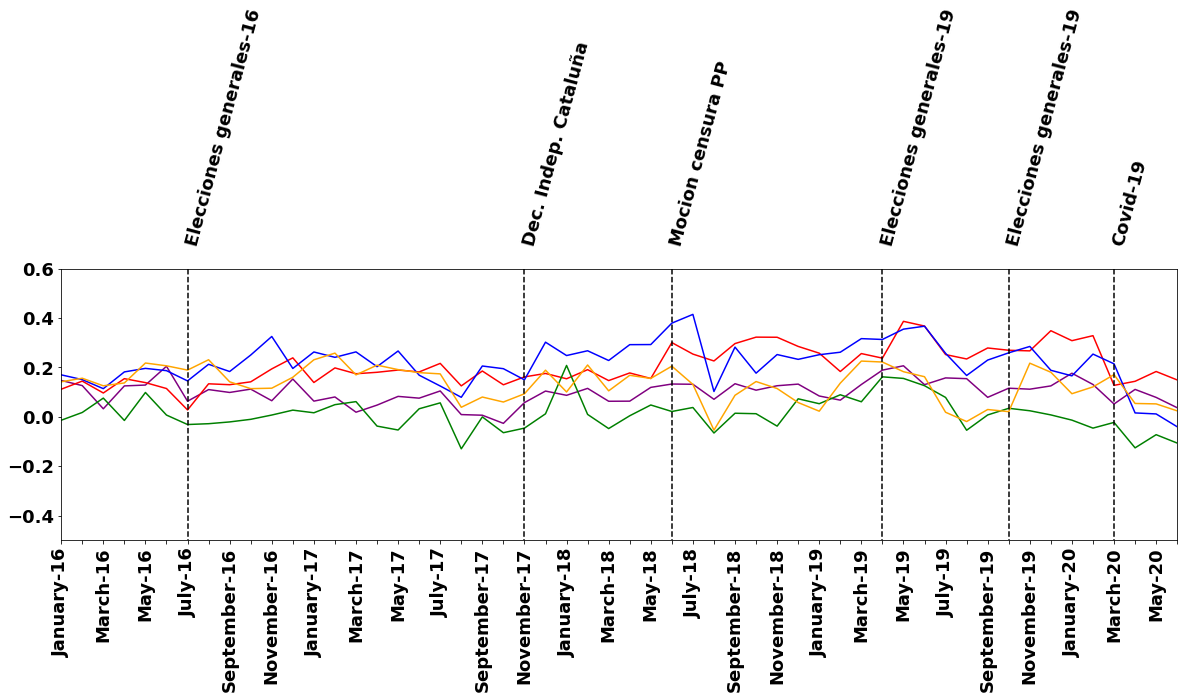

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
import matplotlib
matplotlib.rc('font', **font)

f, ax = plt.subplots(1, figsize=(20, 5))
meses=np.linspace(1,60,60)
meses_name = ['','January-18', 'February-18', 'March-18','April-18','May-18','June-18','July-18','August-18','September-18','October-18','November-18','December-18','January-19', 'February-19', 'March-19','April-19','May-19','June-19','July-19','August-19','September-19','October-19','November-19','December-19','January-20', 'February-20', 'March-20','April-20','May-20']

Podemos1617181920 = Podemos_sentimental_analisis_16_mensual_mu + Podemos_sentimental_analisis_17_mensual_mu + Podemos_sentimental_analisis_18_mensual_mu + Podemos_sentimental_analisis_19_mensual_mu + Podemos_sentimental_analisis_20_mensual_mu

VOX1617181920 = VOX_sentimental_analisis_16_mensual_mu + VOX_sentimental_analisis_17_mensual_mu + VOX_sentimental_analisis_18_mensual_mu + VOX_sentimental_analisis_19_mensual_mu + VOX_sentimental_analisis_20_mensual_mu

PSOE1617181920 = PSOE_sentimental_analisis_16_mensual_mu + PSOE_sentimental_analisis_17_mensual_mu + PSOE_sentimental_analisis_18_mensual_mu + PSOE_sentimental_analisis_19_mensual_mu + PSOE_sentimental_analisis_20_mensual_mu

PP1617181920 = PP_sentimental_analisis_16_mensual_mu + PP_sentimental_analisis_17_mensual_mu + PP_sentimental_analisis_18_mensual_mu + PP_sentimental_analisis_19_mensual_mu + PP_sentimental_analisis_20_mensual_mu

Ciudadanos1617181920 =Ciudadanos_sentimental_analisis_16_mensual_mu +Ciudadanos_sentimental_analisis_17_mensual_mu + Ciudadanos_sentimental_analisis_18_mensual_mu + Ciudadanos_sentimental_analisis_19_mensual_mu + Ciudadanos_sentimental_analisis_20_mensual_mu

ax.plot(meses,np.array(Podemos1617181920),color='purple')
ax.plot(meses,np.array(PSOE1617181920),color='red')
ax.plot(meses,np.array(PP1617181920),color='blue')
ax.plot(meses,np.array(VOX1617181920),color='green')
ax.plot(meses,np.array(Ciudadanos1617181920),color='orange')
plt.ylim(-0.5,0.6)
plt.xlim(1,54)

#sucesos

ax.plot([24 + 6,24 + 6], [-1,1],color = 'black', linestyle='--')
ax.text(24 + 5.8,0.7,'Mocion censura PP',rotation=75,fontsize=18)

ax.plot([24 + 27,24 + 27], [-1,1],color = 'black', linestyle='--')
ax.text(24 + 26.8,0.7,'Covid-19',rotation=75,fontsize=18)

ax.plot([24 + 16,24 + 16], [-1,1],color = 'black', linestyle='--')
ax.text(24 + 15.8,0.7,'Elecciones generales-19',rotation=75,fontsize=18)

ax.plot([24 + 22,24 + 22], [-1,1],color = 'black', linestyle='--')
ax.text(24 + 21.8,0.7,'Elecciones generales-19',rotation=75,fontsize=18)

ax.plot([7,7], [-1,1],color = 'black', linestyle='--')
ax.text(6.8,0.7,'Elecciones generales-16',rotation=75,fontsize=18)

ax.plot([23,23], [-1,1],color = 'black', linestyle='--')
ax.text(22.8,0.7,'Dec. Indep. Cataluña',rotation=75,fontsize=18)

ax.tick_params(left=True, labelleft=True, bottom=True, labelbottom=True, top=False, labeltop=False)
#secax = ax.secondary_xaxis('top',functions=([1,2], [1,2]))
#plt.xticks(np.linspace(1,54,54), ['January-16', 'February-16', 'March-16','April-16','May-16','June-16','July-16','August-16','September-16','October-16','November-16','December-16','January-17', 'February-17', 'March-17','April-17','May-17','June-17','July-17','August-17','September-17','October-17','November-17','December-17','January-18', 'February-18', 'March-18','April-18','May-18','June-18','July-18','August-18','September-18','October-18','November-18','December-18','January-19', 'February-19', 'March-19','April-19','May-19','June-19','July-19','August-19','September-19','October-19','November-19','December-19','January-20', 'February-20', 'March-20','April-20','May-20'], rotation=90) 
plt.xticks(np.linspace(1,54,54), ['January-16', '', 'March-16','','May-16','','July-16','','September-16','','November-16','','January-17', '', 'March-17','','May-17','','July-17','','September-17','','November-17','','January-18', '', 'March-18','','May-18','','July-18','','September-18','','November-18','','January-19', '', 'March-19','','May-19','','July-19','','September-19','','November-19','','January-20', '', 'March-20','','May-20'], rotation=90) 

plt.show()